In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVC
import xgboost as xgb


from sklearn.metrics import mean_squared_error, r2_score


**IMPORTING NECESSARY LIBRARY**

**IMPORTING THE DATASET**

In [2]:
df=pd.read_csv("air_quality_index.csv")

In [3]:
df.head()

City      Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  1/1/2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  1/2/2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  1/3/2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  1/4/2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  1/5/2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

   AQI AQI_Bucket  
0  NaN        NaN  
1  NaN        NaN  
2  NaN        NaN  
3  NaN        NaN  
4  NaN        NaN

In [4]:
df.shape

(29531, 12)

In [5]:
df.tail()

City       Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  6/27/2020  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  6/28/2020  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  6/29/2020  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  6/30/2020  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Visakhapatnam   7/1/2020  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2   AQI    AQI_Bucket  
29526  0.47   8.55  41.0          Good  
29527  0.52  12.72  70.0  Satisfactory  
29528  0.48   8.42  68.0  Satisfactory  
29529  0.52   9.84  54.0  Satisfactory  
29530  0.59   2.10  50.0          Good

In [6]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2           AQI  
count  19203.000000  27472.000000  25677.000000  24850.000000  
mean      23.483476      2.248598     14.531977    166.463581  
std       25.684275      6.962884     18.133775    140.696585  
min        0.010000      0.000000      0.010000     13.000000  
25%        8.580000      0.510000      5.670000     81.000000  
50%       15.850000      0.890000      9.160000    118.000000  
75%       30.020000      1.450000     15.220000    208.000000  
max      352.890000    175.810000    193.860000   2049.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  AQI         24850 non-null  float64
 11  AQI_Bucket  24850 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.7+ MB


In [8]:
missing_percentage = (df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"The overall missing percentage in the DataFrame is: {missing_percentage:.2f}%")

The overall missing percentage in the DataFrame is: 14.87%


**THEREFORE THERE ARE NULL VALUES IN MANY COLUMNS
 WE HAVE TO REMOVE IN DATA CLEANING**

In [9]:
df["AQI_Bucket"].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [10]:
df["AQI_Bucket"].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64



```
# This is formatted as code
```

**SINCE MODERATE VALUE in AQI_Bucket col is max so replace all the NAN values with the MODERATE**

In [11]:
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

In [12]:
df.head()

City      Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  1/1/2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  1/2/2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  1/3/2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  1/4/2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  1/5/2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

   AQI AQI_Bucket  
0  NaN   Moderate  
1  NaN   Moderate  
2  NaN   Moderate  
3  NaN   Moderate  
4  NaN   Moderate

In [13]:
numeric=df.select_dtypes(include=[float]).columns
numeric

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'AQI'], dtype='object')

In [14]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
AQI            4681
AQI_Bucket        0
dtype: int64

**replacing all Nan values from numerical columns with median**

In [15]:
for column in numeric:
  df[column]=df[column].fillna((df[column].median()))

In [16]:
cat_data=df.select_dtypes(include=[object])
cat_data.columns

Index(['City', 'Date', 'AQI_Bucket'], dtype='object')

In [17]:
df.head()

City      Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  1/1/2015  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  1/2/2015  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  1/3/2015  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  1/4/2015  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  1/5/2015  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2    AQI AQI_Bucket  
0  27.64  118.0   Moderate  
1  24.55  118.0   Moderate  
2  29.07  118.0   Moderate  
3  18.59  118.0   Moderate  
4  39.33  118.0   Moderate

In [18]:
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
AQI           0
AQI_Bucket    0
dtype: int64

**therefore all missing values are filled **

**EXAMINING THE NUMERICAL AND CATEGORICAL COLUMNS**

**visualizing correlation between numerical variables**

**CHECKING FOR DUPLICATES**

In [19]:
df.duplicated().sum()

0

**CONVERTING DATE ATTRITUBUTE TO DATE TIME DATATYPE**

In [20]:
df['Date']=pd.to_datetime(df["Date"])
df['Date']

0       2015-01-01
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-05
           ...    
29526   2020-06-27
29527   2020-06-28
29528   2020-06-29
29529   2020-06-30
29530   2020-07-01
Name: Date, Length: 29531, dtype: datetime64[ns]

**Detecting And Filtering Out The Outliers Based on Interquartile Bounds**

<Figure size 800x600 with 0 Axes>

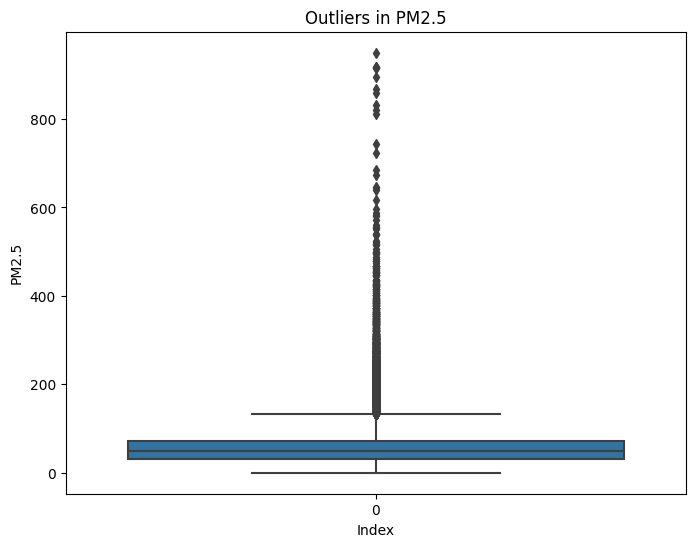

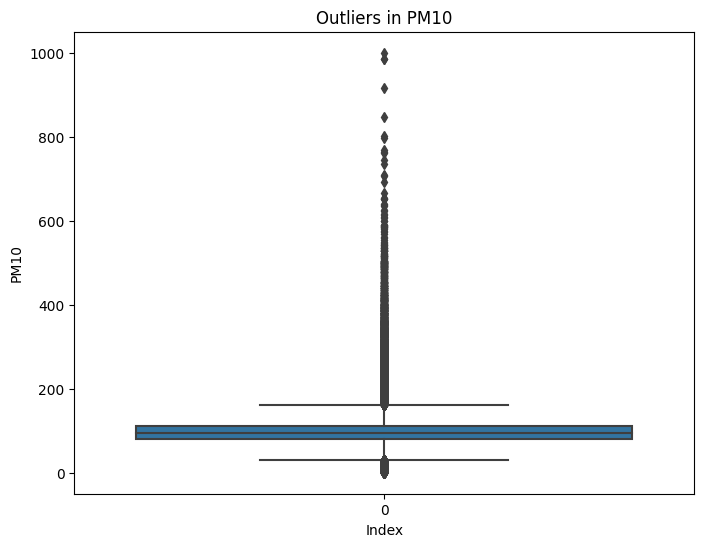

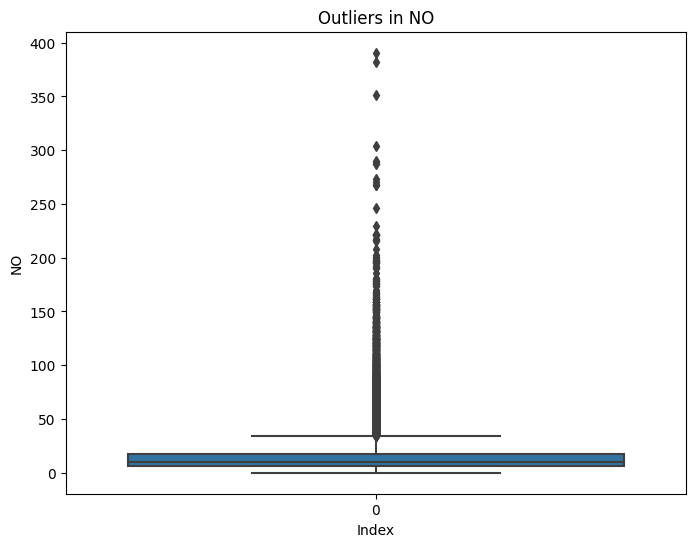

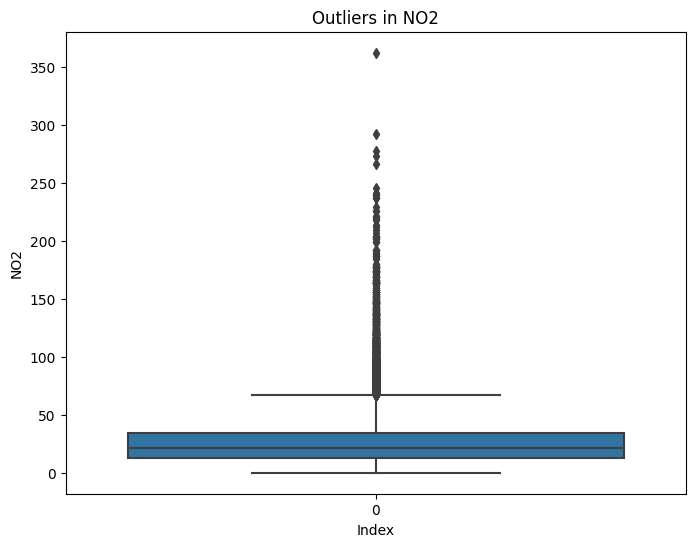

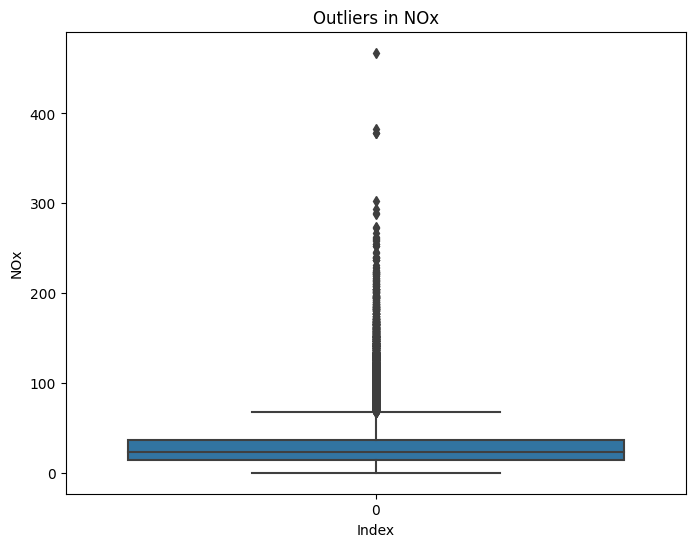

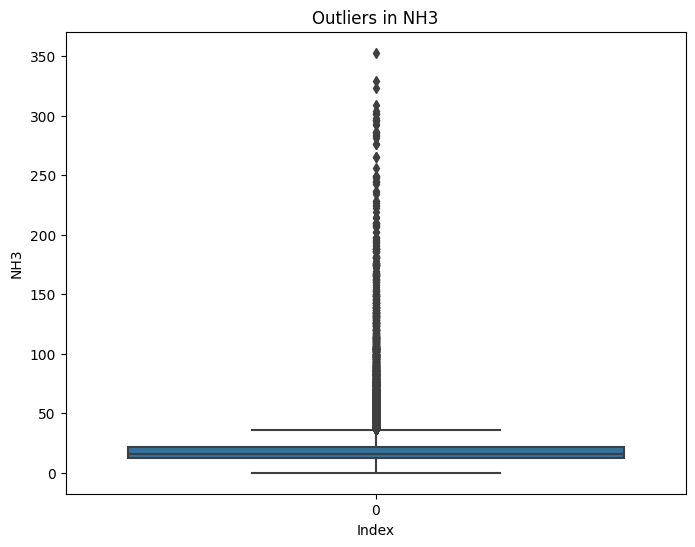

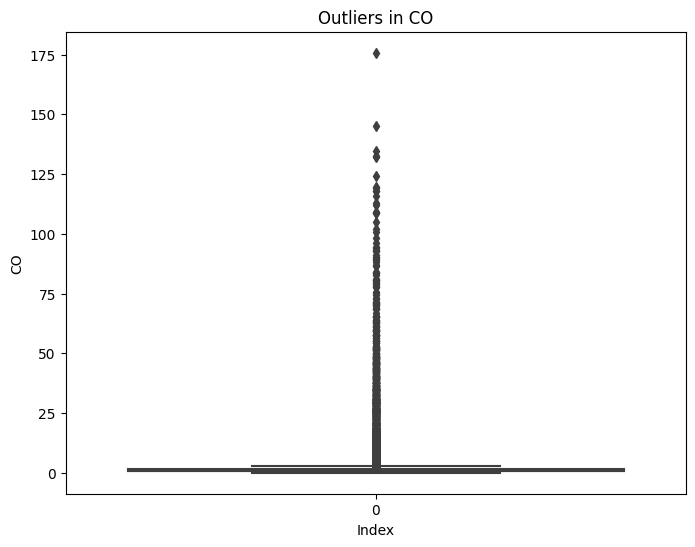

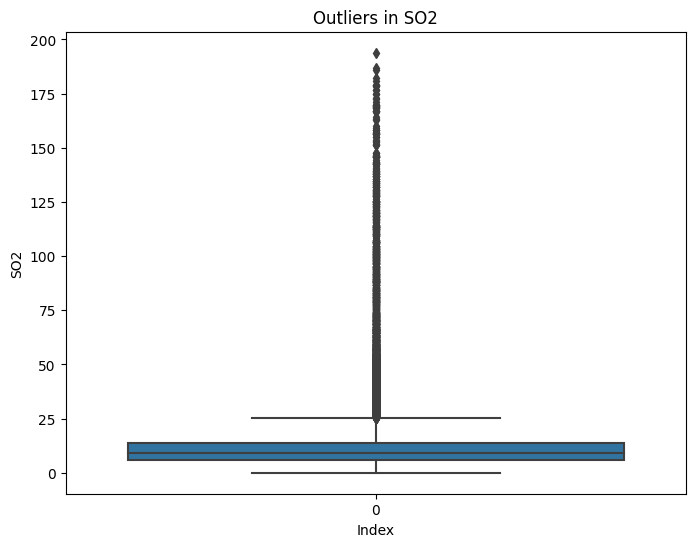

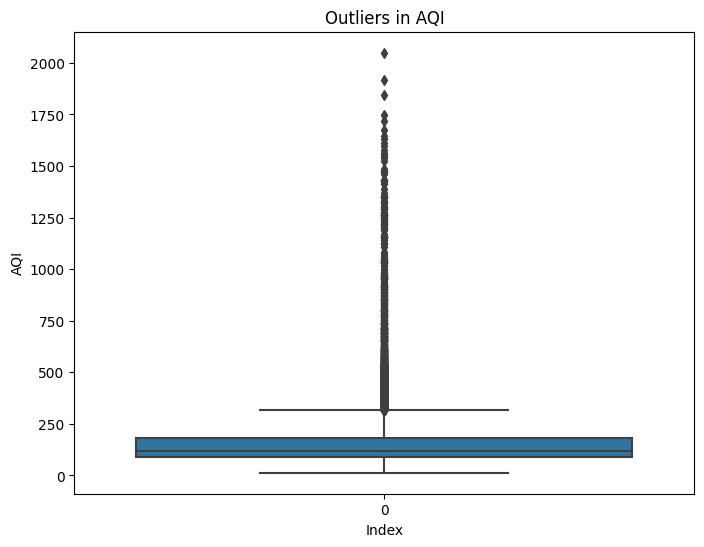

In [21]:
plt.figure(figsize=(8, 6))
for column in numeric:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])
  plt.title(f'Outliers in {column}')
  plt.xlabel('Index')
  plt.ylabel(column)
  plt.show()

In [22]:

# Iterate over numeric columns and remove outliers
for column in numeric:
  # Calculate quartiles and IQR
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1

  # Define the upper and lower bounds for outliers
  upper_bound = q3 + 3 * iqr
  lower_bound = q1 - 3 * iqr

  # Filter out the outliers
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
  if not outliers.empty:
    df.loc[outliers.index, column] = np.log(df.loc[outliers.index, column])





In [23]:
df.shape

(29531, 12)

In [24]:
df.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  
0  27.640000  118.0   Moderate  
1  24.550000  118.0   Moderate  
2  29.070000  118.0   Moderate  
3  18.590000  118.0   Moderate  
4   3.671988  118.0   Moderate

**EDA**

In [25]:
df.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  
0  27.640000  118.0   Moderate  
1  24.550000  118.0   Moderate  
2  29.070000  118.0   Moderate  
3  18.590000  118.0   Moderate  
4   3.671988  118.0   Moderate

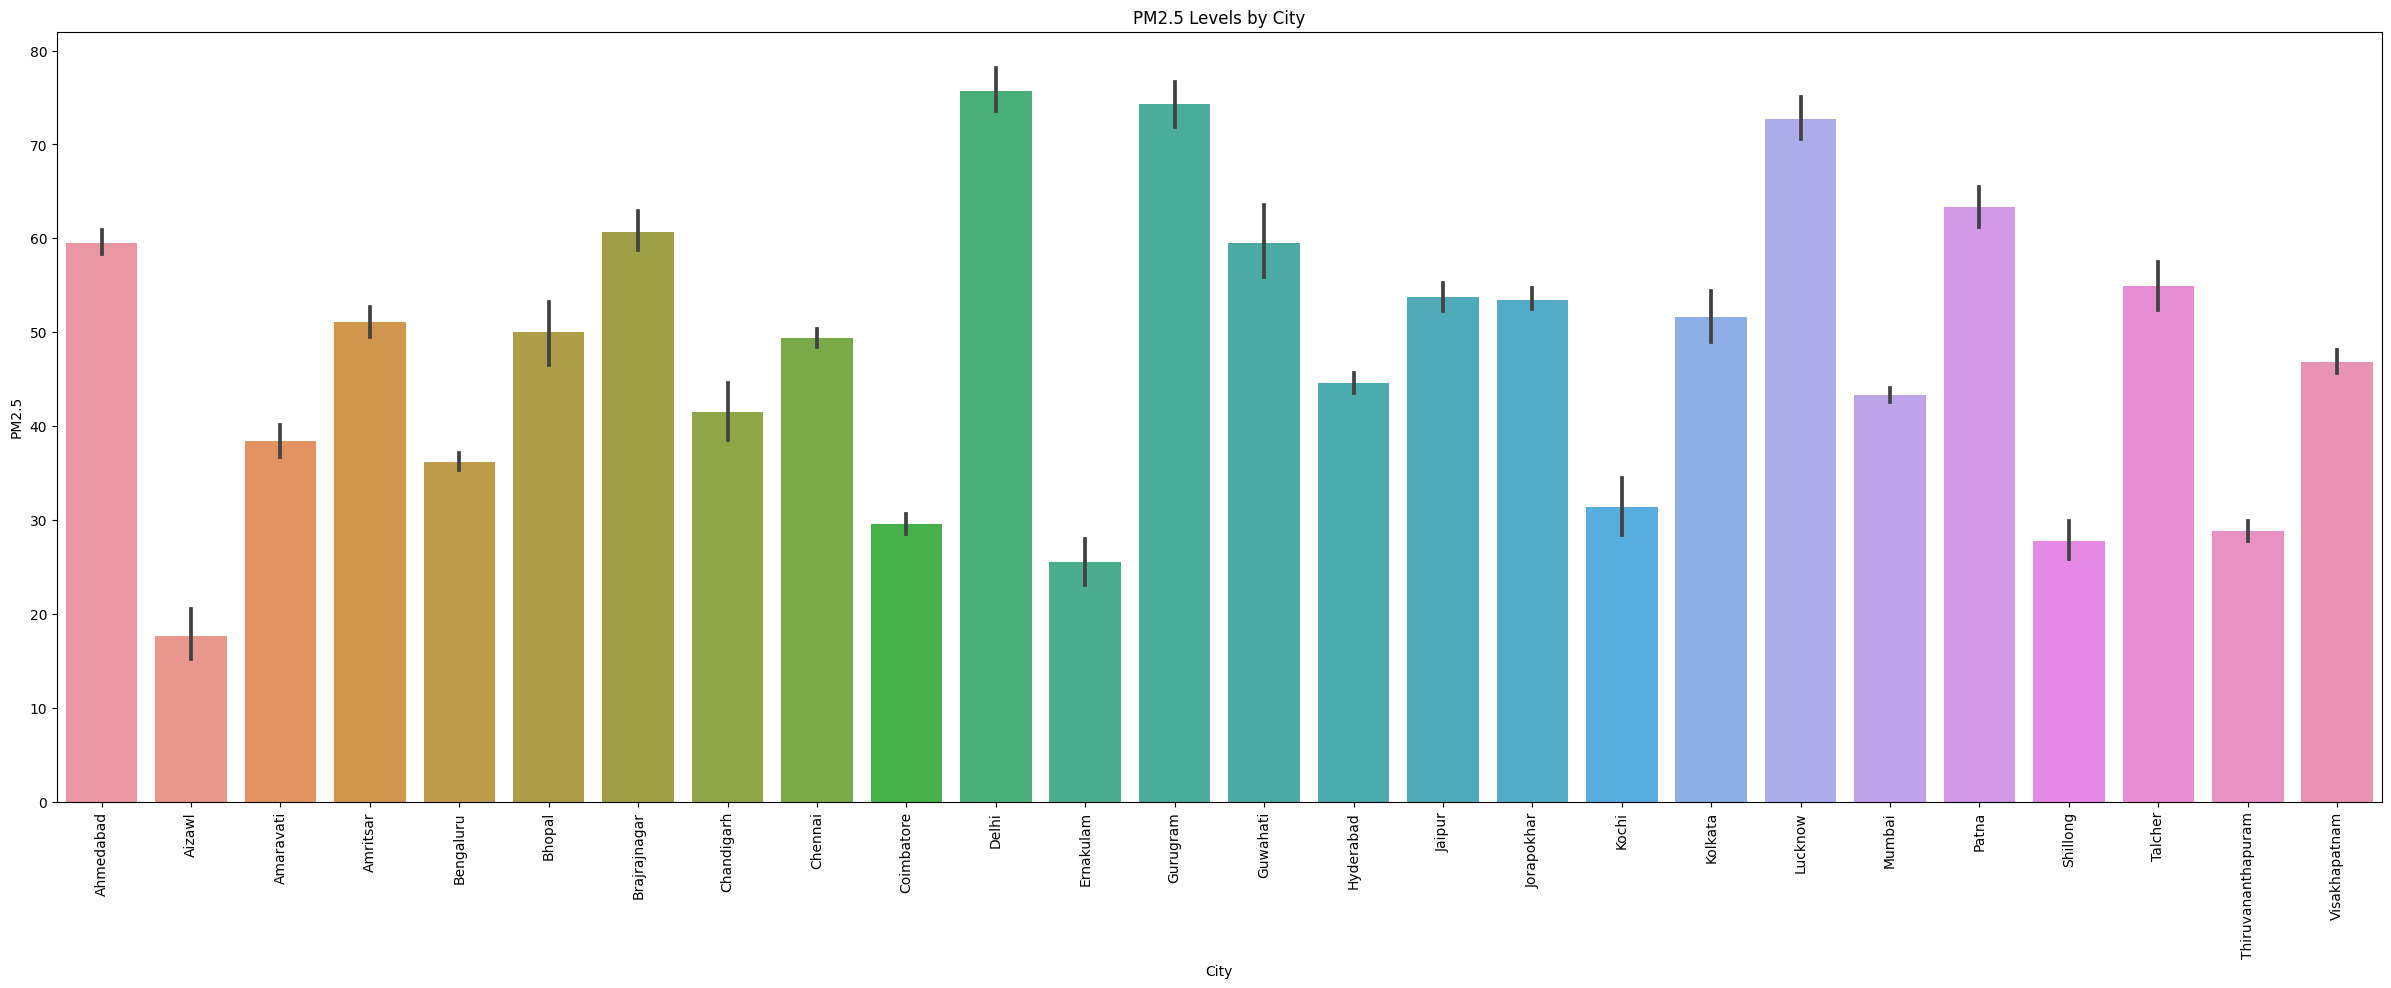

In [26]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('PM2.5 Levels by City')
sns.barplot(x='City',y='PM2.5',data=df);

#PM 2.5 in different cities

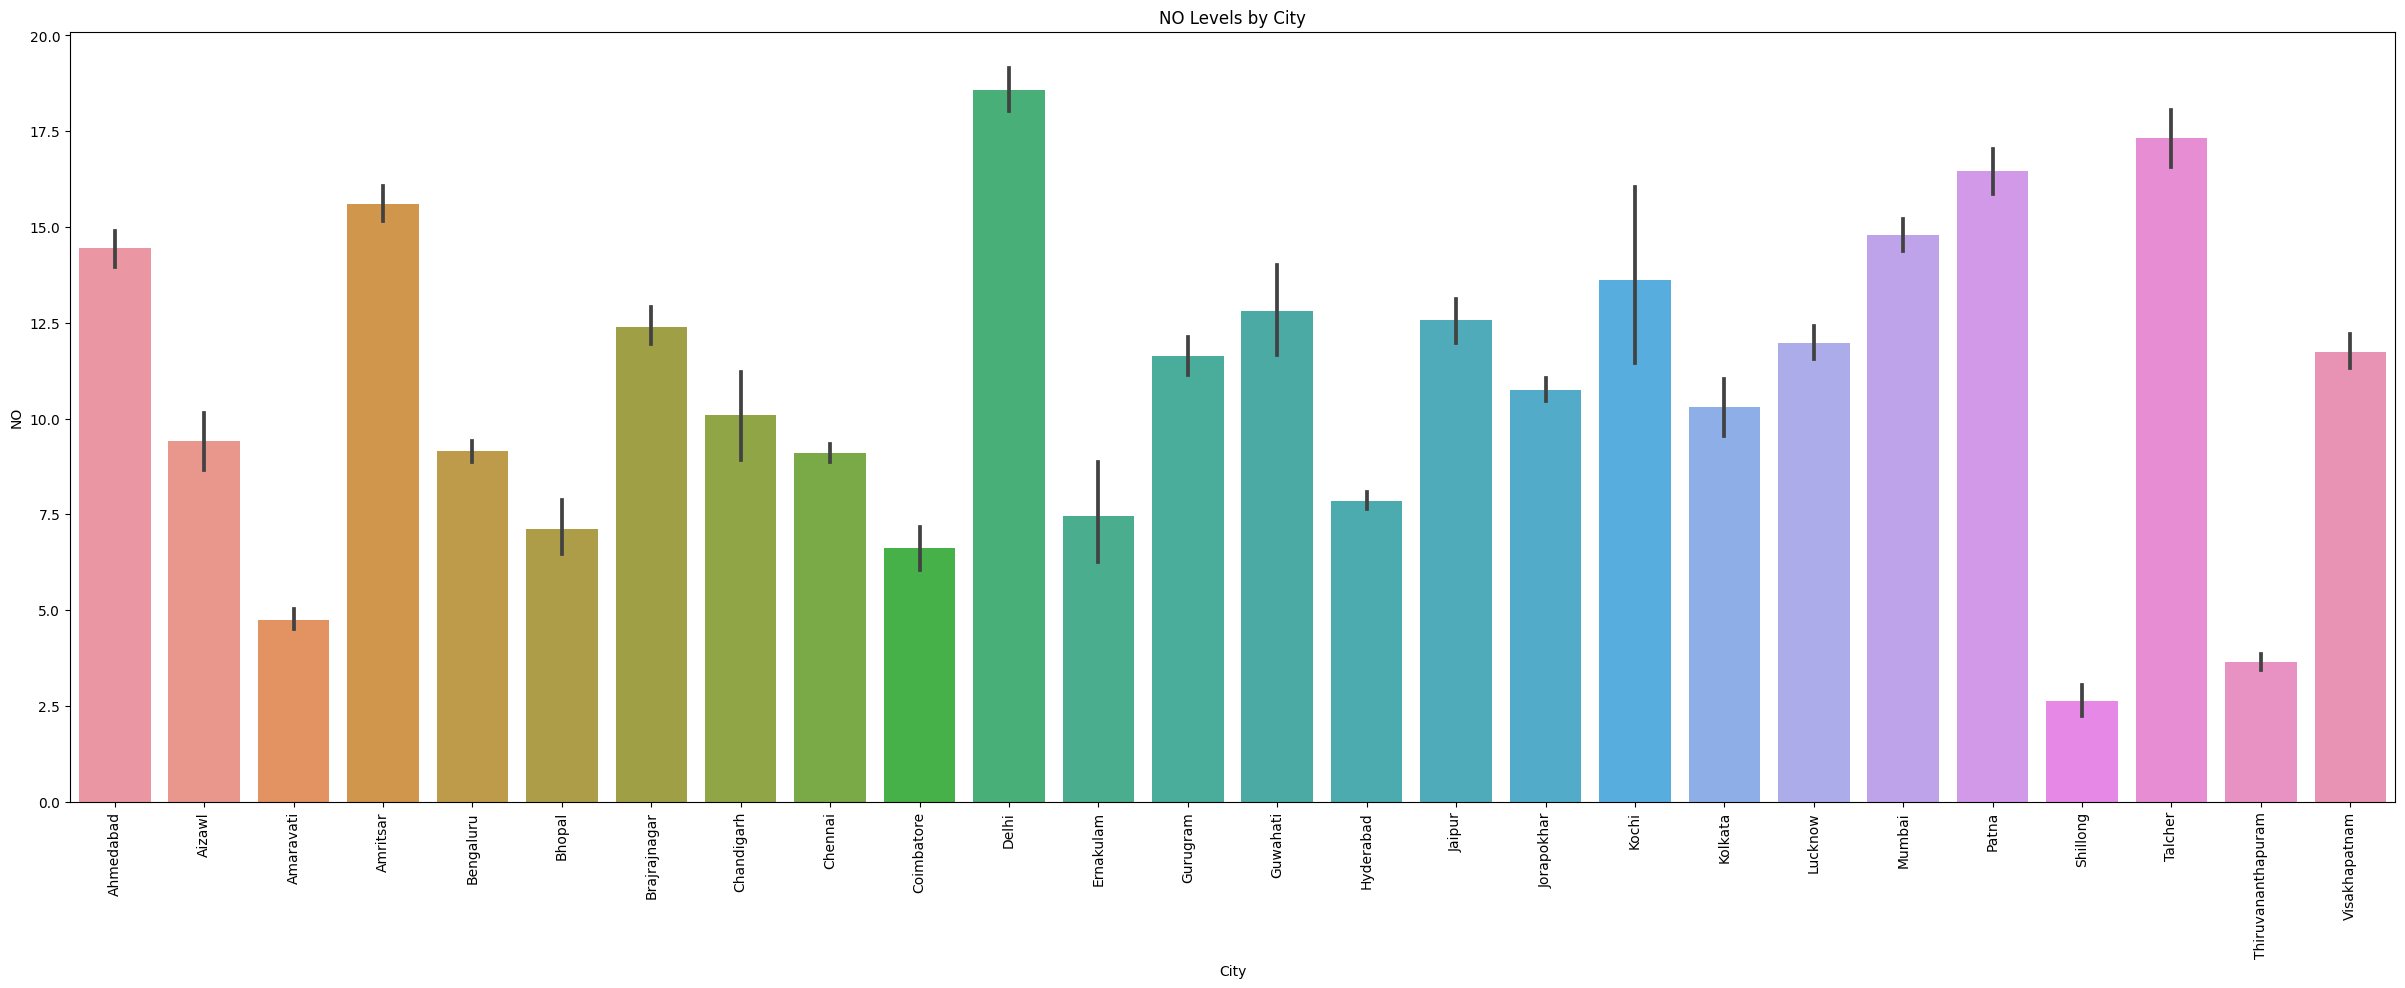

In [27]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('NO Levels by City')
sns.barplot(x='City',y='NO',data=df);
#levels of NO in different cities

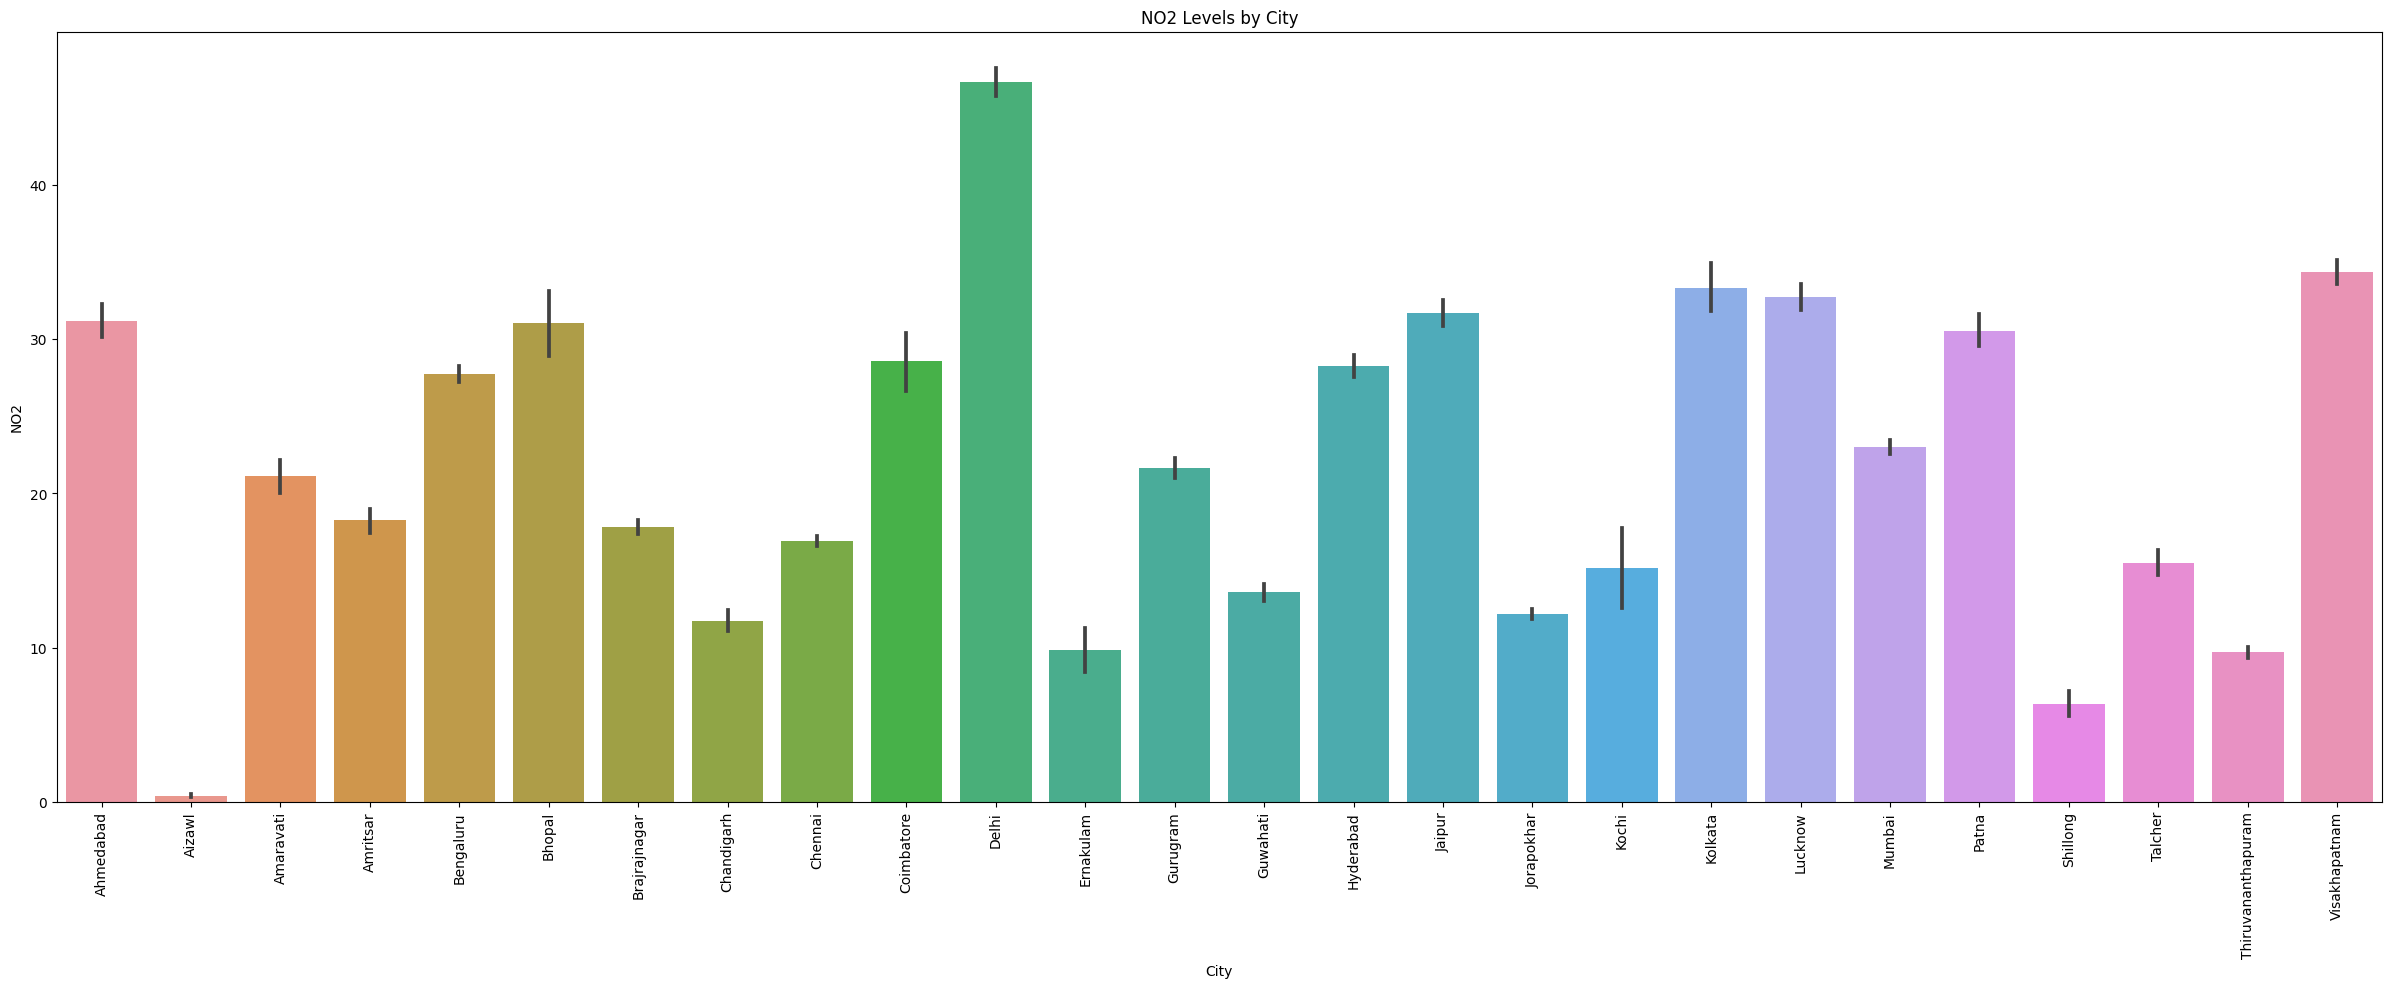

In [28]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('NO2 Levels by City')
sns.barplot(x='City',y='NO2',data=df);
#levels of Particulate matter NO2 in different cities

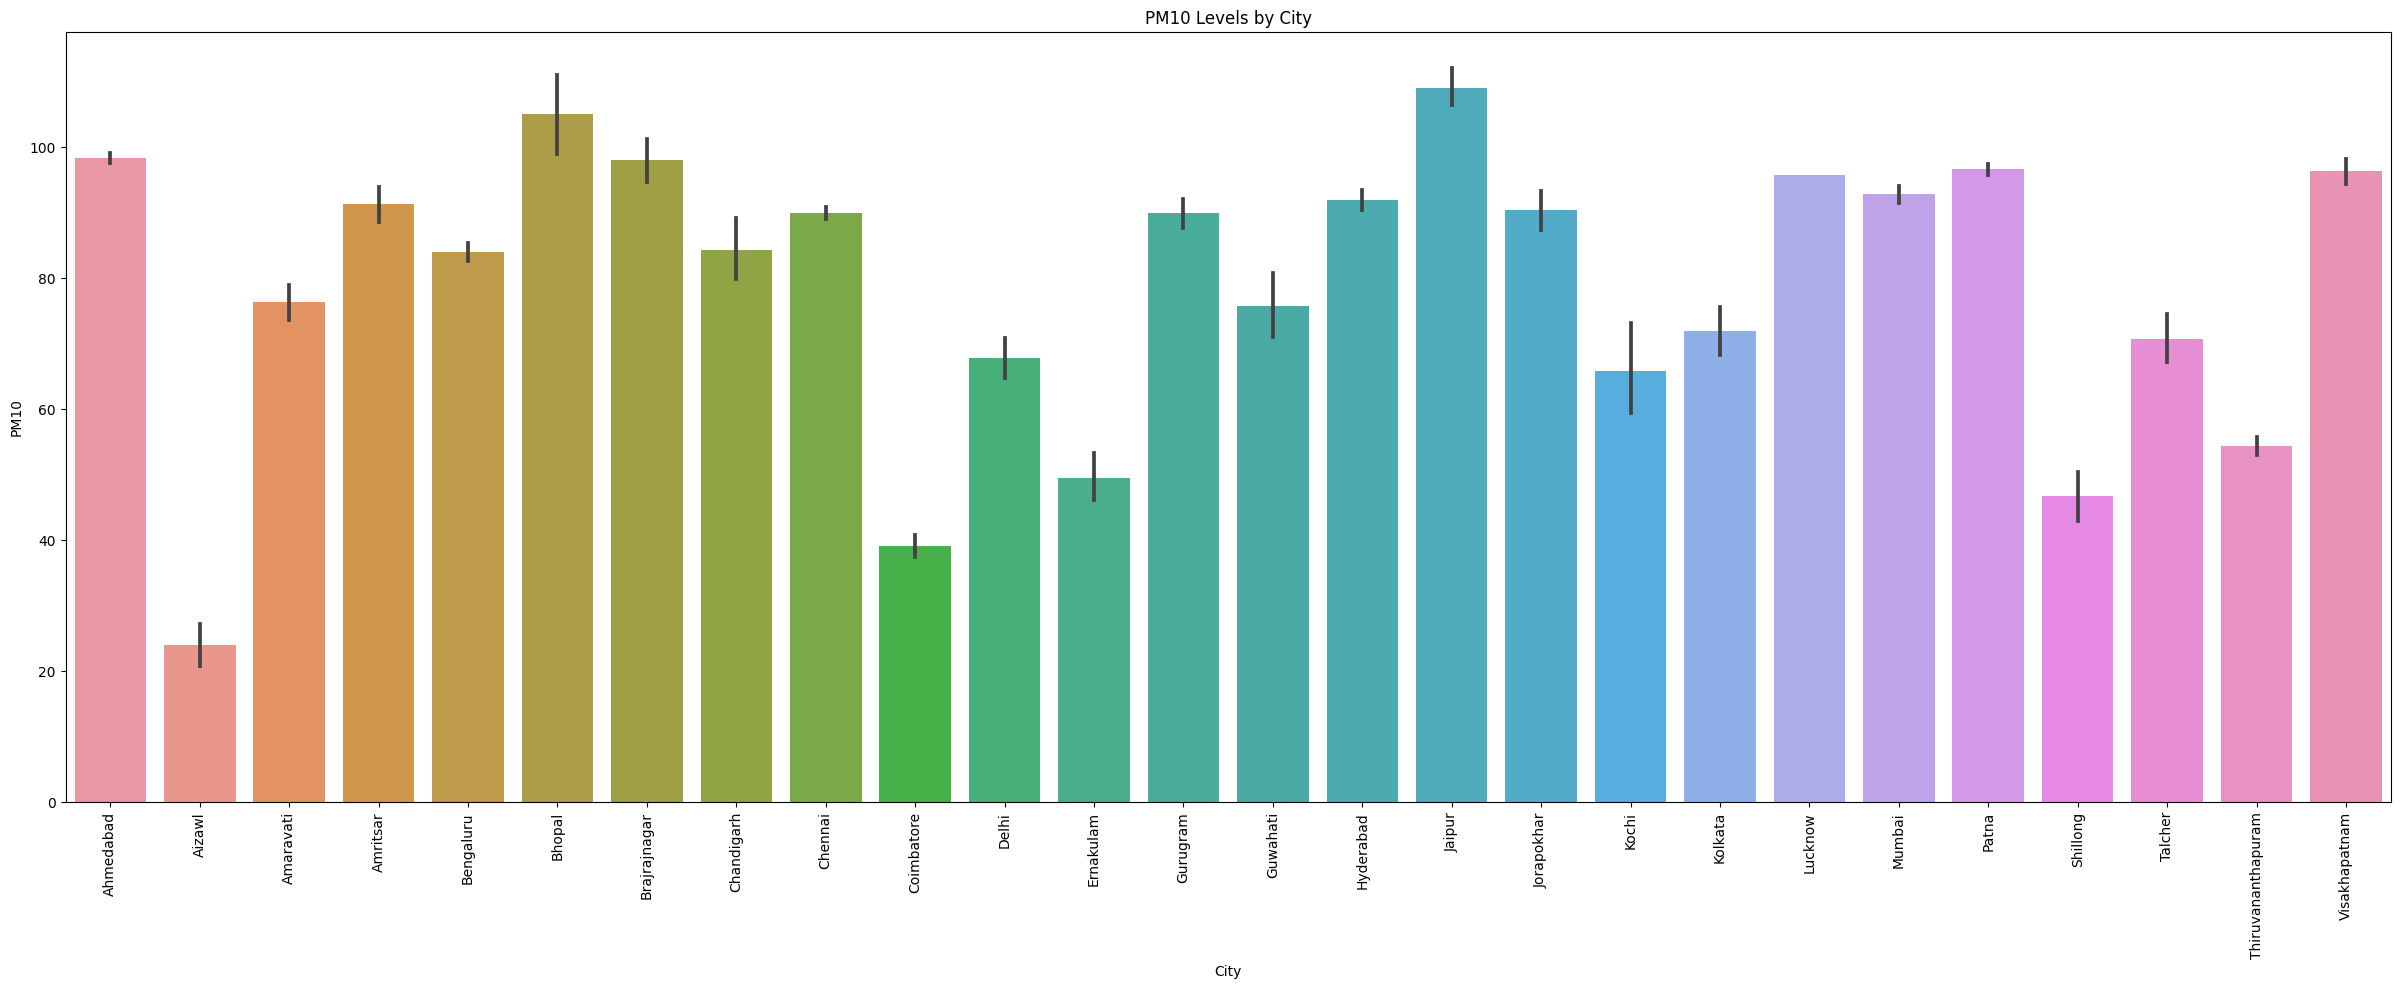

In [29]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('PM10 Levels by City')
sns.barplot(x='City',y='PM10',data=df);
#levels of Particulate matter(diameter<=10 micrometer) in different cities


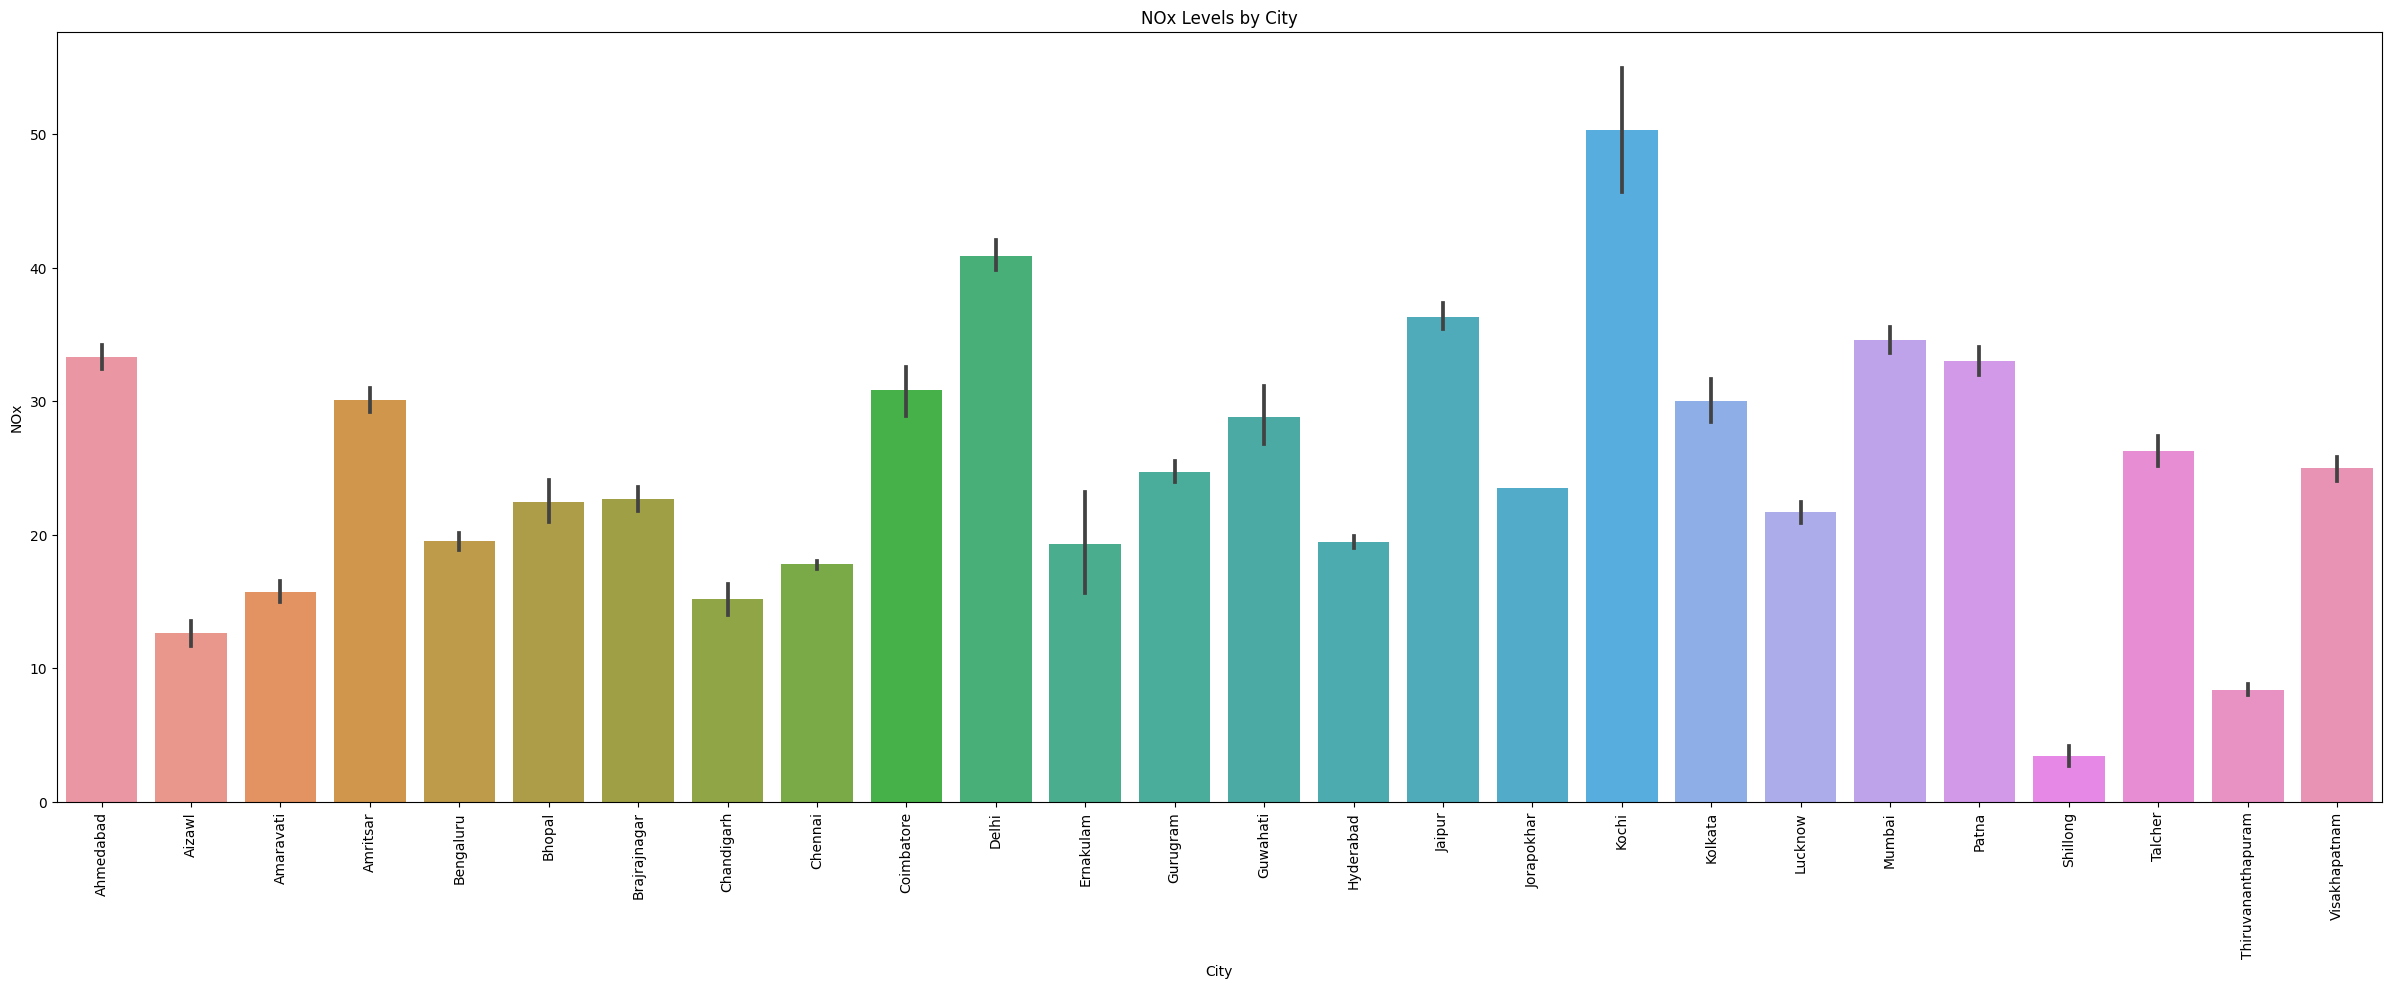

In [30]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('NOx Levels by City')
sns.barplot(x='City',y='NOx',data=df);

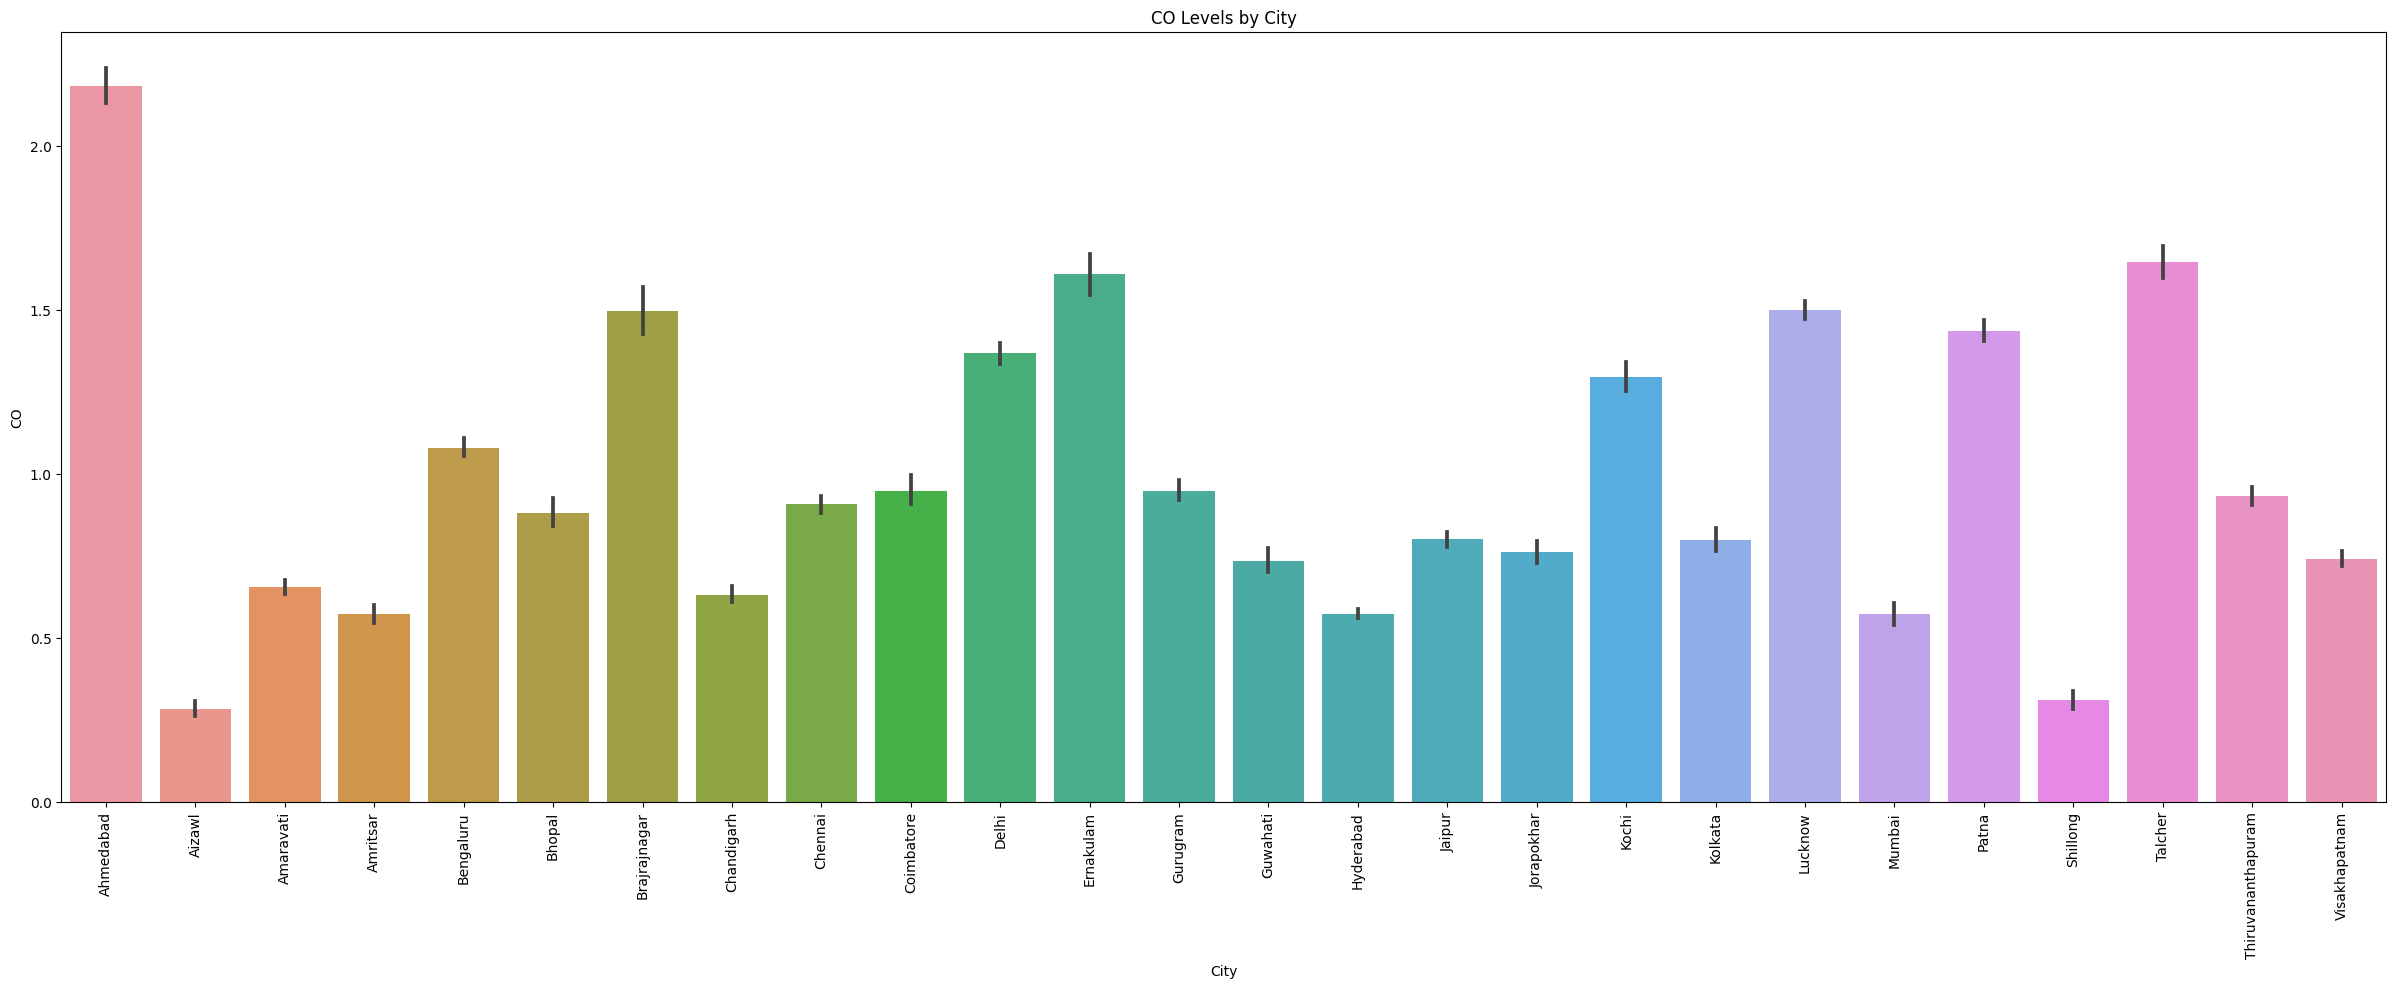

In [31]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('CO Levels by City')
sns.barplot(x='City',y='CO',data=df);

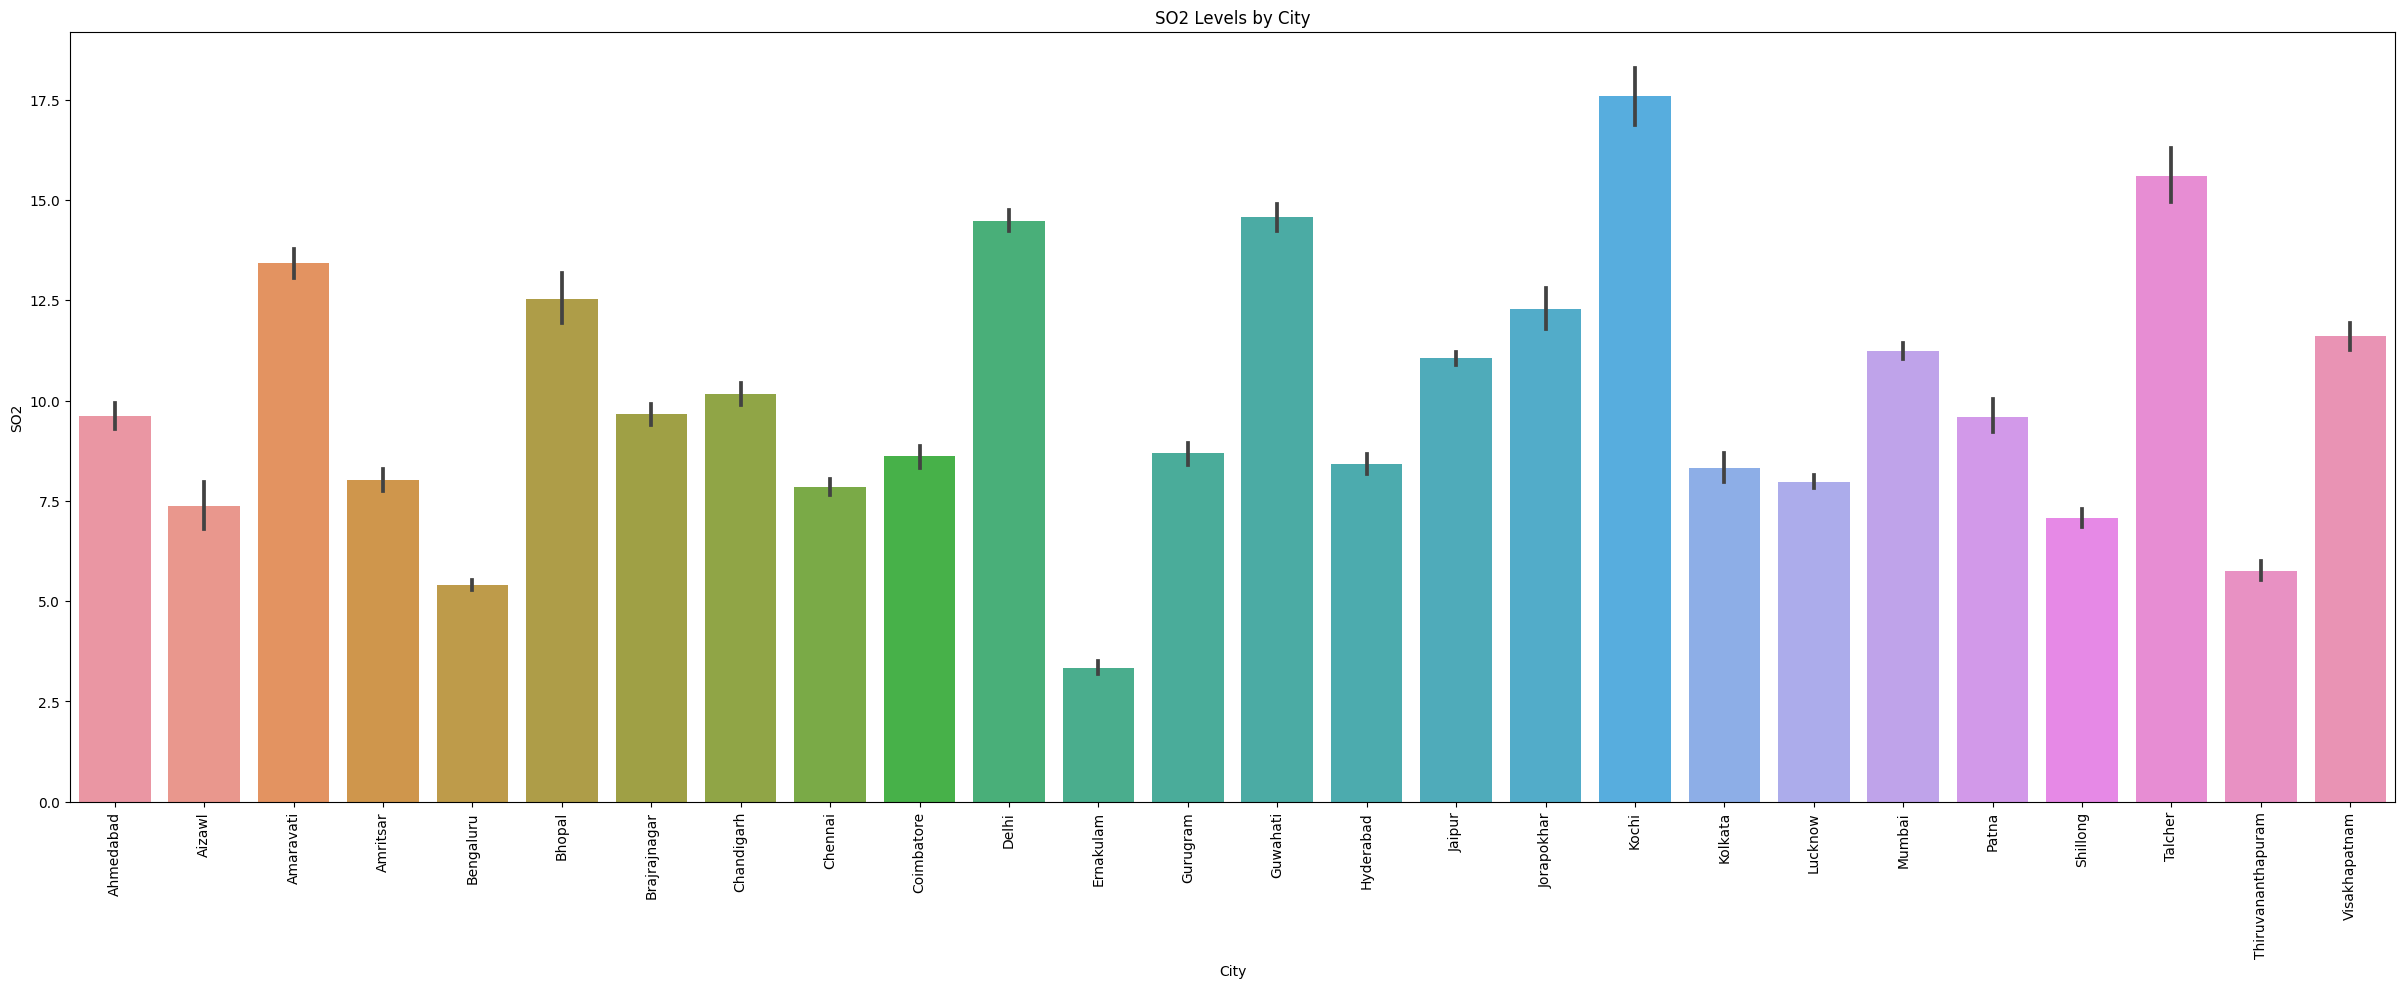

In [32]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('SO2 Levels by City')
sns.barplot(x='City',y='SO2',data=df);

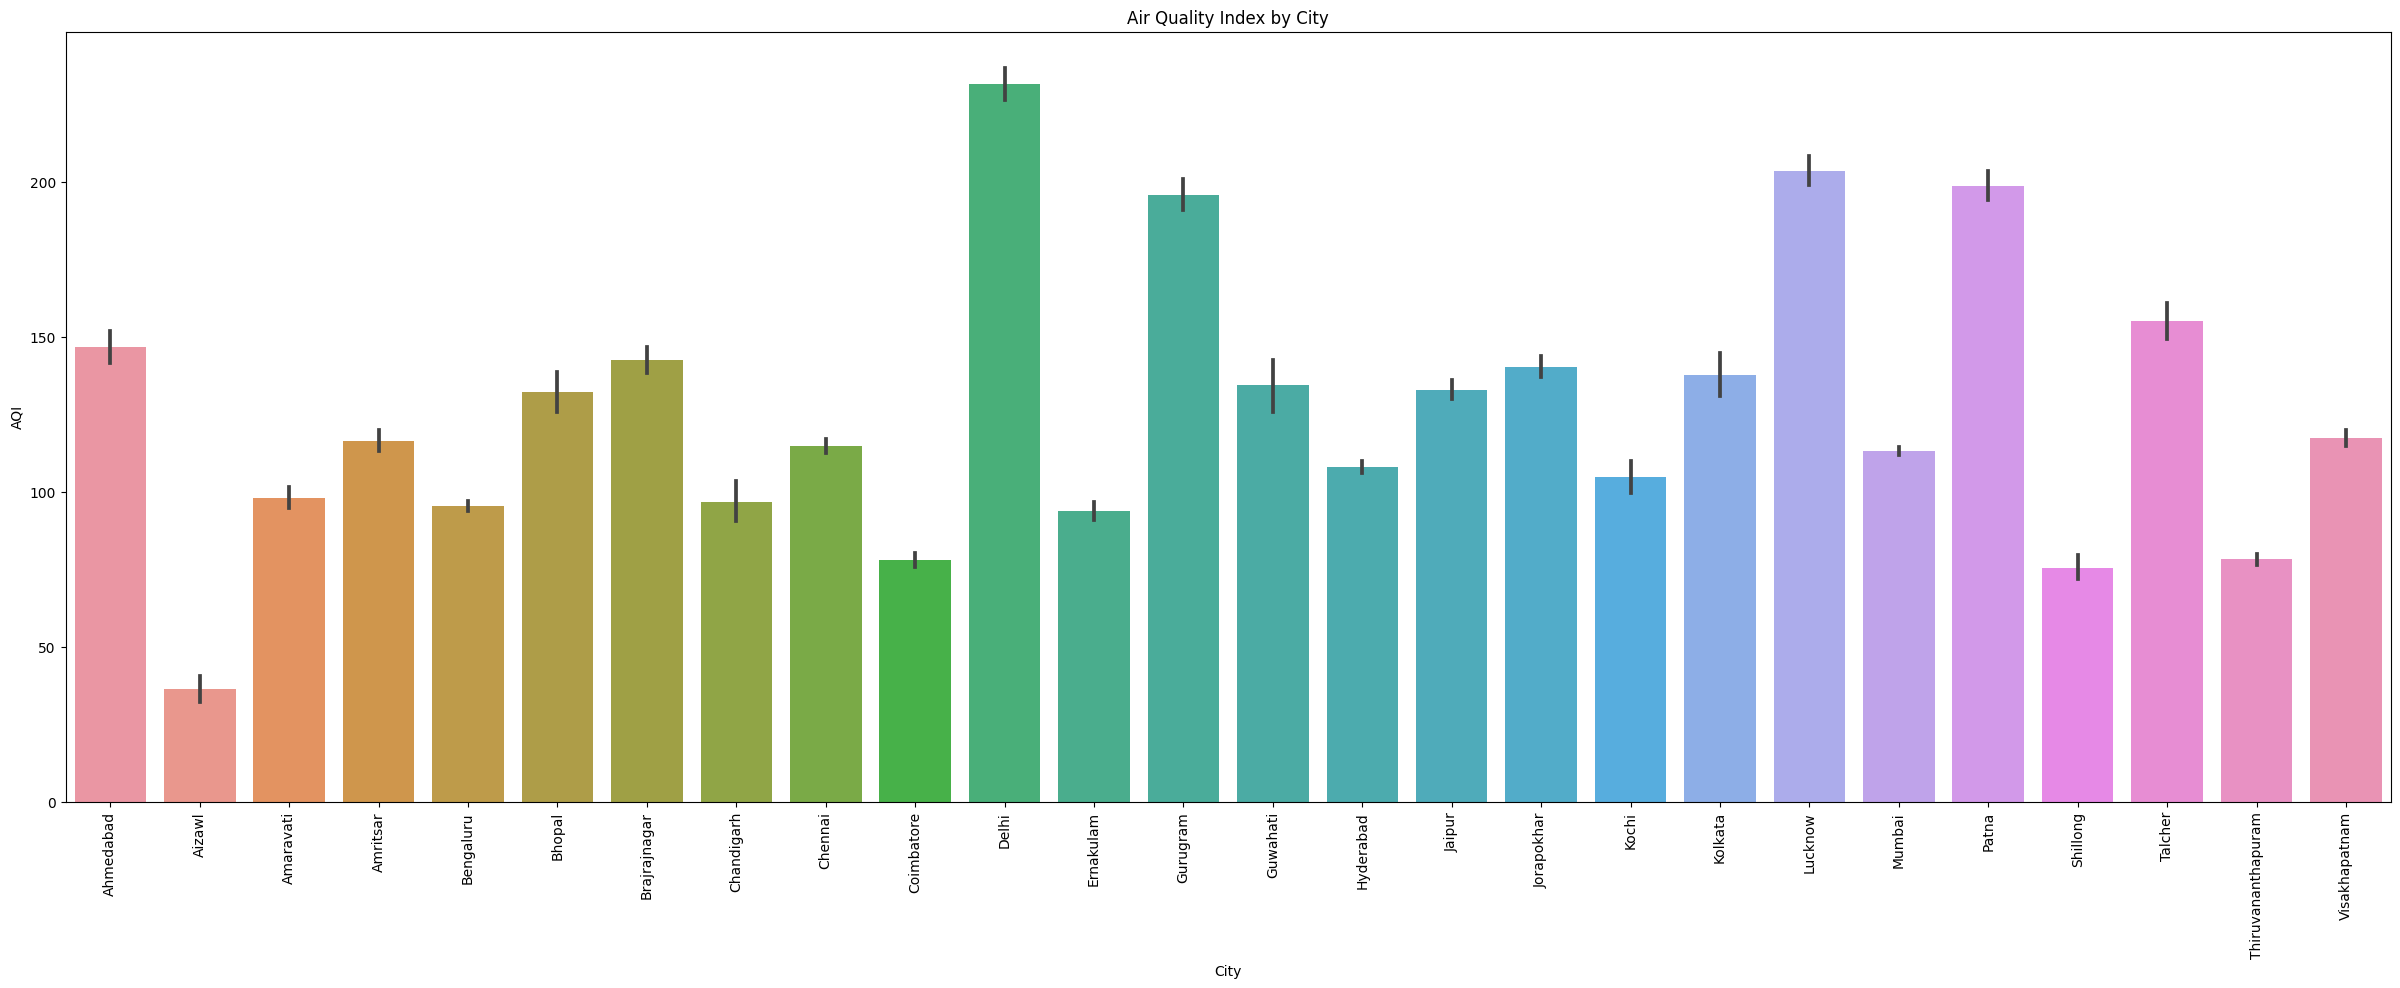

In [33]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.title('Air Quality Index by City')
sns.barplot(x='City',y='AQI',data=df);

In [34]:
df.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  
0  27.640000  118.0   Moderate  
1  24.550000  118.0   Moderate  
2  29.070000  118.0   Moderate  
3  18.590000  118.0   Moderate  
4   3.671988  118.0   Moderate

In [35]:
average_scores = df.groupby('City').mean(numeric_only=True)

highest_scores = average_scores.idxmax()
lowest_scores = average_scores.idxmin()

for pollutant in df.columns[2:10]:
    highest_city = highest_scores[pollutant]
    lowest_city = lowest_scores[pollutant]
    print(f"For {pollutant}, the city with the highest average score is: {highest_city}")
    print(f"For {pollutant}, the city with the lowest average score is: {lowest_city}")
    print()


For PM2.5, the city with the highest average score is: Delhi
For PM2.5, the city with the lowest average score is: Aizawl

For PM10, the city with the highest average score is: Jaipur
For PM10, the city with the lowest average score is: Aizawl

For NO, the city with the highest average score is: Delhi
For NO, the city with the lowest average score is: Shillong

For NO2, the city with the highest average score is: Delhi
For NO2, the city with the lowest average score is: Aizawl

For NOx, the city with the highest average score is: Kochi
For NOx, the city with the lowest average score is: Shillong

For NH3, the city with the highest average score is: Delhi
For NH3, the city with the lowest average score is: Shillong

For CO, the city with the highest average score is: Ahmedabad
For CO, the city with the lowest average score is: Aizawl

For SO2, the city with the highest average score is: Kochi
For SO2, the city with the lowest average score is: Ernakulam



In [36]:
average_scores = df.groupby('City').mean(numeric_only=True)
highest_scores = average_scores.idxmax()
lowest_scores = average_scores.idxmin()
Comparision = pd.DataFrame(columns=['Pollutant', 'Highest Average City', 'Lowest Average City'])

for pollutant in df.columns[2:10]:
    highest_city = highest_scores[pollutant]
    lowest_city = lowest_scores[pollutant]
    Comparision = pd.concat([Comparision, pd.DataFrame({
        'Pollutant': [pollutant],
        'Highest Average City': [highest_city],
        'Lowest Average City': [lowest_city]
    })], ignore_index=True)

print(Comparision)

  Pollutant Highest Average City Lowest Average City
0     PM2.5                Delhi              Aizawl
1      PM10               Jaipur              Aizawl
2        NO                Delhi            Shillong
3       NO2                Delhi              Aizawl
4       NOx                Kochi            Shillong
5       NH3                Delhi            Shillong
6        CO            Ahmedabad              Aizawl
7       SO2                Kochi           Ernakulam


In [37]:
avg_readings = df.groupby('City').mean(numeric_only=True).reset_index().round(2)
avg_readings.head()

City  PM2.5   PM10     NO    NO2    NOx    NH3    CO    SO2     AQI
0  Ahmedabad  59.55  98.25  14.45  31.21  33.30  15.85  2.18   9.63  146.62
1     Aizawl  17.69  23.99   9.41   0.39  12.61  22.31  0.28   7.38   36.24
2  Amaravati  38.44  76.35   4.75  21.10  15.75  12.21  0.65  13.43   97.93
3   Amritsar  51.06  91.32  15.60  18.26  30.07  12.97  0.57   8.01  116.33
4  Bengaluru  36.18  84.00   9.14  27.75  19.55  19.51  1.08   5.40   95.49

In [38]:
# avg readings for AQI across all cities (pie chart)
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
trace13=go.Pie(labels=avg_readings['City'], values=avg_readings['AQI'],
             title='Average AQI readings by City')
fig=go.Figure(trace13)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [39]:
trace1=go.Pie(labels=avg_readings['City'], values=avg_readings['PM2.5'].round(2),
             title='Average PM2.5 readings by City')
fig=go.Figure(trace1)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [40]:
# avg readings for PM10 across all cities (pie chart)
trace2=go.Pie(labels=avg_readings['City'], values=avg_readings['PM10'].round(2),
             title='Average PM10 readings by City')
fig=go.Figure(trace2)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# **Top 10 cities for high average PM 2.5 level.**

*Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated*

In [41]:
pm2_51=df.groupby("City")["PM2.5"].mean().round(2)
pm2_51

In [42]:
#selecting the top 10
pm2_51.sort_values(ascending=False).head(10)

<Axes: title={'center': 'Top 10 PM 2.5 Levels in Different Cities'}, xlabel='Level', ylabel='City'>

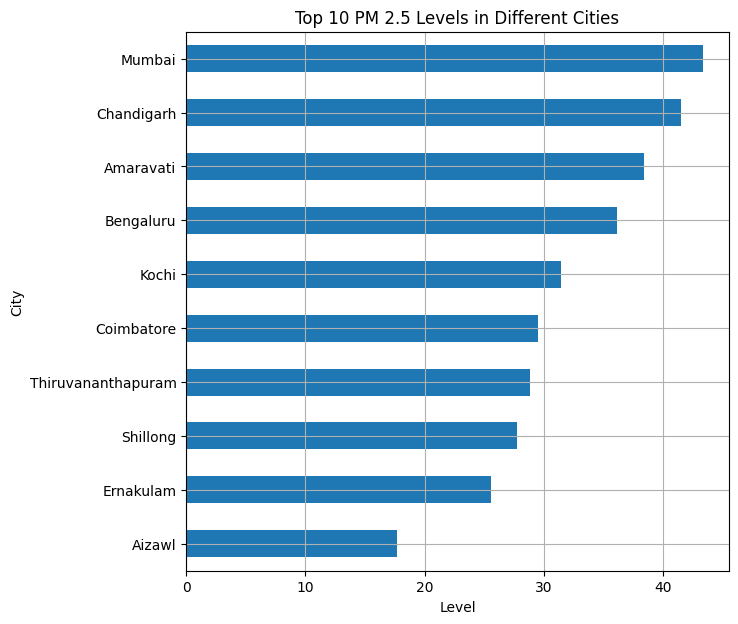

In [43]:
top_pm2_5 = pm2_51.sort_values().head(10)
top_pm2_5.plot(figsize=(7, 7), kind="barh", title="Top 10 PM 2.5 Levels in Different Cities", xlabel="Level", ylabel="City", grid=True)



# **Top 10 cities for high average PM 10 level.**
Particles are defined by their diameter for air quality regulatory purposes. Those with a diameter of 10 microns or less (PM10) are inhalable into the lungs and can induce adverse health effects

In [44]:
pm10=df.groupby("City")["PM10"].mean().round(2)
pm10

City
Ahmedabad              98.25
Aizawl                 23.99
Amaravati              76.35
Amritsar               91.32
Bengaluru              84.00
Bhopal                105.01
Brajrajnagar           97.99
Chandigarh             84.25
Chennai                89.91
Coimbatore             39.03
Delhi                  67.79
Ernakulam              49.50
Gurugram               89.85
Guwahati               75.63
Hyderabad              91.82
Jaipur                109.05
Jorapokhar             90.35
Kochi                  65.79
Kolkata                71.92
Lucknow                95.68
Mumbai                 92.74
Patna                  96.56
Shillong               46.62
Talcher                70.73
Thiruvananthapuram     54.33
Visakhapatnam          96.28
Name: PM10, dtype: float64

In [45]:
pm10.sort_values(ascending=False).head(10)

City
Jaipur           109.05
Bhopal           105.01
Ahmedabad         98.25
Brajrajnagar      97.99
Patna             96.56
Visakhapatnam     96.28
Lucknow           95.68
Mumbai            92.74
Hyderabad         91.82
Amritsar          91.32
Name: PM10, dtype: float64

<Axes: title={'center': 'Top 10 PM10 Levels in Different Cities'}, xlabel='Level', ylabel='City'>

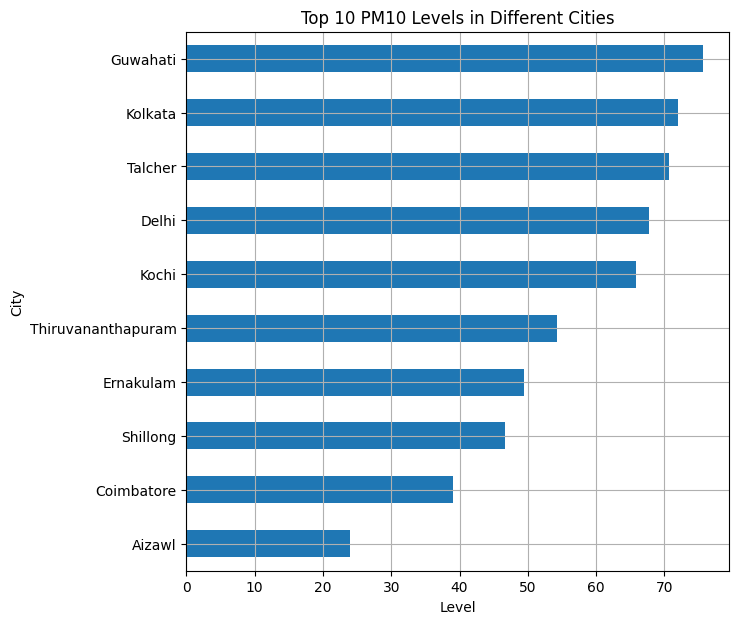

In [46]:
top_pm10 = pm10.sort_values().head(10)
top_pm10.plot(figsize=(7, 7), kind="barh", title="Top 10 PM10 Levels in Different Cities", xlabel="Level", ylabel="City", grid=True)

# **Air Quality Index**

In [47]:
df.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  
0  27.640000  118.0   Moderate  
1  24.550000  118.0   Moderate  
2  29.070000  118.0   Moderate  
3  18.590000  118.0   Moderate  
4   3.671988  118.0   Moderate

In [48]:
df['year'] = pd.to_datetime(df['Date']).dt.year
df.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  year  
0  27.640000  118.0   Moderate  2015  
1  24.550000  118.0   Moderate  2015  
2  29.070000  118.0   Moderate  2015  
3  18.590000  118.0   Moderate  2015  
4   3.671988  118.0   Moderate  2015

# Year Wise Data

In [49]:
x1 = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()
x1.head()

City  year        AQI
0           Ahmedabad  2018   6.874198
1              Aizawl  2020  24.000000
2           Amaravati  2020  54.000000
3  Thiruvananthapuram  2020  64.000000
4            Shillong  2020  65.000000

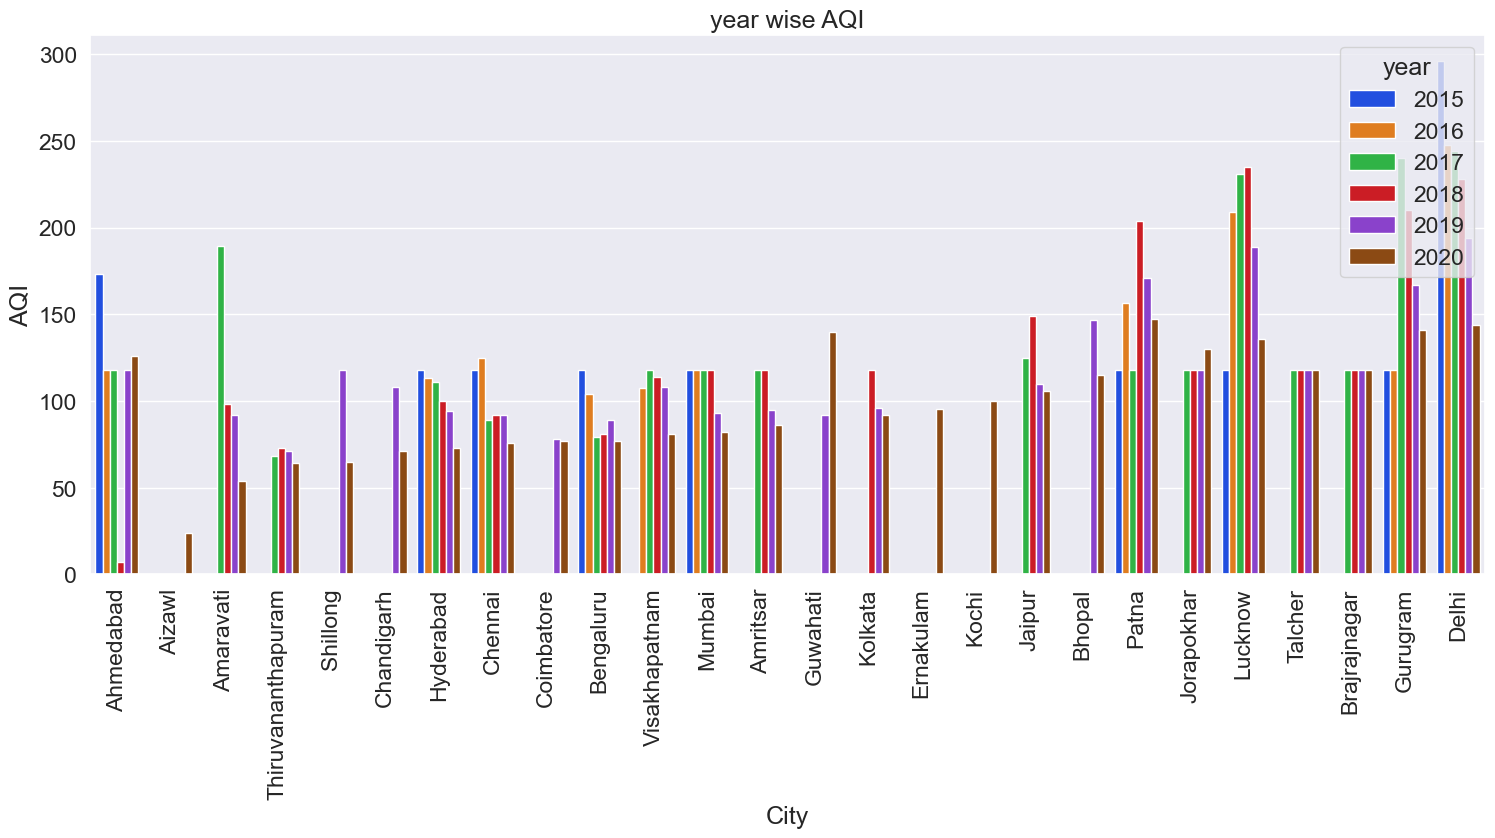

In [50]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

The plot shows a huge spike in the AQI for the city of Ahmedabad during the years 2018 & 2019.

Majority of this is coming from Power plant exhaust, Road dust and transport.

# Monthly Wise Data

In [51]:
df['month'] = pd.to_datetime(df['Date']).dt.month
x2 = df[['City','AQI','month']].groupby(['City','month']).median().sort_values(['AQI']).reset_index()
x2.head()

City  month   AQI
0    Aizawl      6  20.0
1    Aizawl      7  20.0
2    Aizawl      5  21.0
3  Shillong      7  24.0
4  Shillong      5  28.0

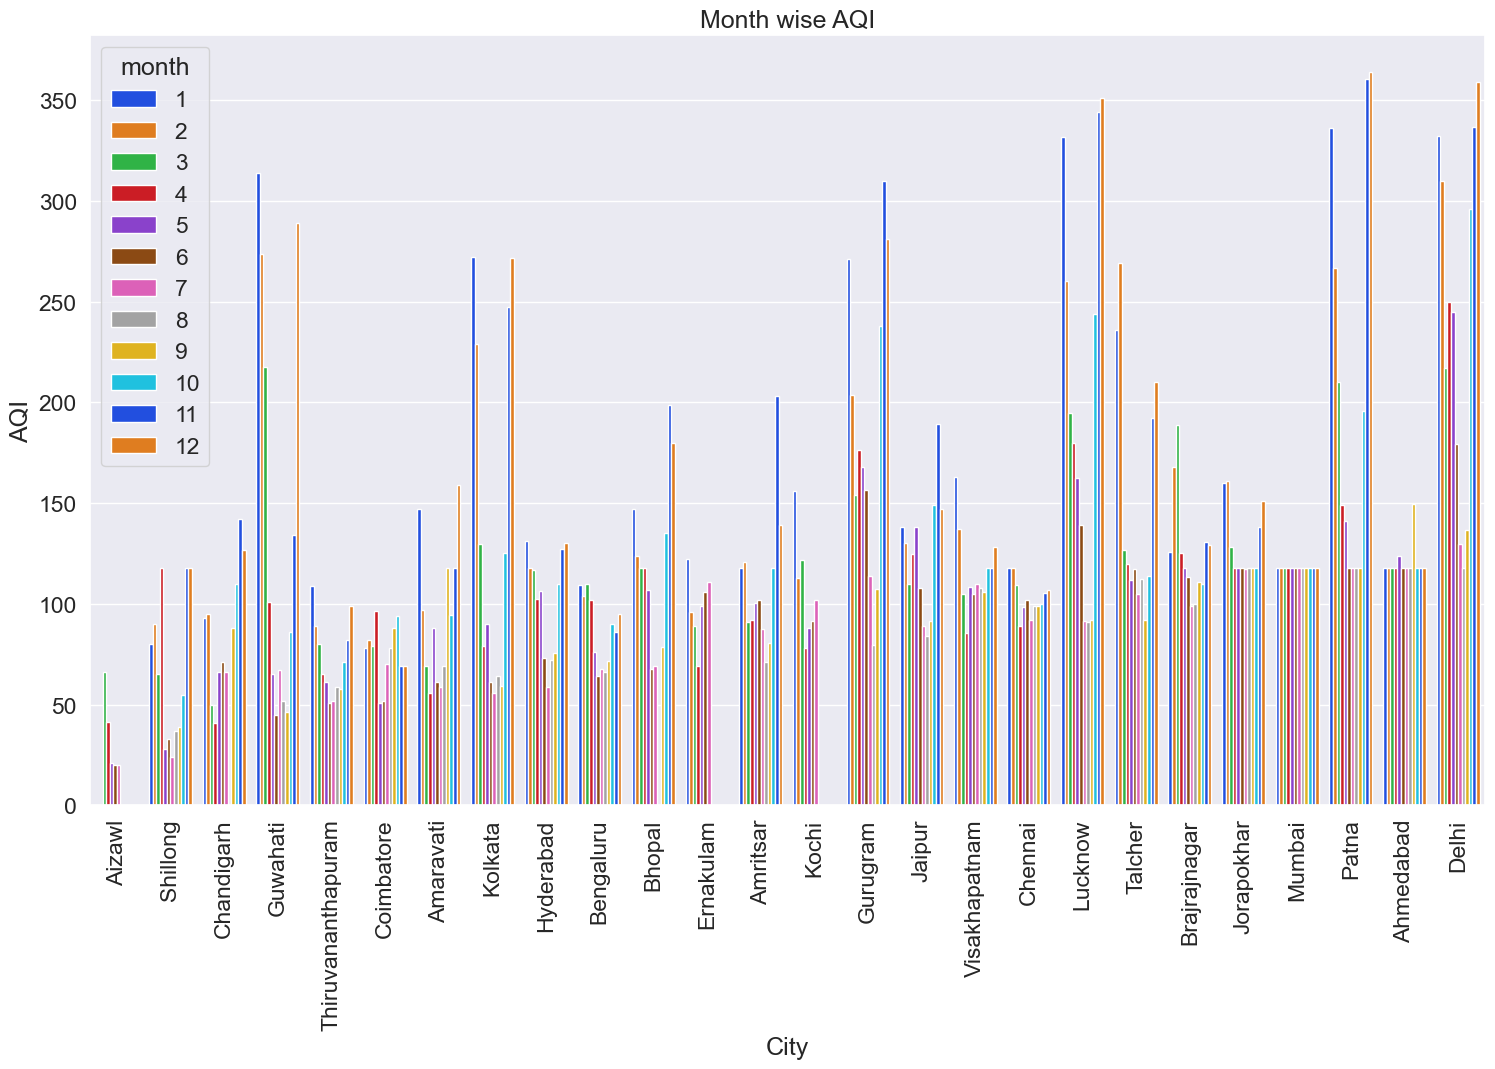

In [52]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x2,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

*Tha AQI among most cities spiked on Nov, Dec, Jan & Feb months, Could be an indicator of how the way of celebrating certain festivals(which fall during or close to these months) effect the environment around us.*

In [53]:
df1= pd.read_csv('Indian Cities Database.csv')
df1.rename(columns={'City': 'city'}, inplace=True)

In [54]:
df1.head(2)

city        Lat      Long country iso2      State
0    Abohar  30.144533  74.19552   India   IN     Punjab
1  Adilabad  19.400000  78.31000   India   IN  Telangana

In [55]:
df.head(2)

City       Date  PM2.5   PM10    NO    NO2    NOx    NH3    CO    SO2  \
0  Ahmedabad 2015-01-01  48.57  95.68  0.92  18.22  17.15  15.85  0.92  27.64   
1  Ahmedabad 2015-01-02  48.57  95.68  0.97  15.69  16.46  15.85  0.97  24.55   

     AQI AQI_Bucket  year  month  
0  118.0   Moderate  2015      1  
1  118.0   Moderate  2015      1

In [56]:
df_2 = pd.merge(df, df1, how = 'left', left_on = 'City',right_on = 'city')
df_2.head(10)

City       Date  PM2.5   PM10         NO    NO2       NOx    NH3  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.920000  18.22  17.15000  15.85   
1  Ahmedabad 2015-01-02  48.57  95.68   0.970000  15.69  16.46000  15.85   
2  Ahmedabad 2015-01-03  48.57  95.68  17.400000  19.30  29.70000  15.85   
3  Ahmedabad 2015-01-04  48.57  95.68   1.700000  18.48  17.97000  15.85   
4  Ahmedabad 2015-01-05  48.57  95.68  22.100000  21.42  37.76000  15.85   
5  Ahmedabad 2015-01-06  48.57  95.68  45.410000  38.48  81.50000  15.85   
6  Ahmedabad 2015-01-07  48.57  95.68   4.719926  40.62   4.87344  15.85   
7  Ahmedabad 2015-01-08  48.57  95.68   4.392843  36.74  96.75000  15.85   
8  Ahmedabad 2015-01-09  48.57  95.68  29.160000  31.00  48.00000  15.85   
9  Ahmedabad 2015-01-10  48.57  95.68   9.890000   7.04   0.00000  15.85   

         CO        SO2    AQI AQI_Bucket  year  month       city        Lat  \
0  0.920000  27.640000  118.0   Moderate  2015      1  Ahmedabad  23.025793   
1  0.970000  24.550000  118.0   Moderate  2015      1  Ahmedabad  23.025793   
2  2.856470  29.070000  118.0   Moderate  2015      1  Ahmedabad  23.025793   
3  1.700000  18.590000  118.0   Moderate  2015      1  Ahmedabad  23.025793   
4  3.095578   3.671988  118.0   Moderate  2015      1  Ahmedabad  23.025793   
5  3.815732   3.823410  118.0   Moderate  2015      1  Ahmedabad  23.025793   
6  4.719926  32.280000  118.0   Moderate  2015      1  Ahmedabad  23.025793   
7  4.392843   3.651697  118.0   Moderate  2015      1  Ahmedabad  23.025793   
8  3.372798   4.072099  118.0   Moderate  2015      1  Ahmedabad  23.025793   
9  0.890000   8.290000  118.0   Moderate  2015      1  Ahmedabad  23.025793   

        Long country iso2    State  
0  72.587265   India   IN  Gujarat  
1  72.587265   India   IN  Gujarat  
2  72.587265   India   IN  Gujarat  
3  72.587265   India   IN  Gujarat  
4  72.587265   India   IN  Gujarat  
5  72.587265   India   IN  Gujarat  
6  72.587265   India   IN  Gujarat  
7  72.587265   India   IN  Gujarat  
8  72.587265   India   IN  Gujarat  
9  72.587265   India   IN  Gujarat

In [57]:
df_2 = df_2[['City', 'AQI_Bucket', 'AQI', 'Lat', 'Long']]
df_2.head()


City AQI_Bucket    AQI        Lat       Long
0  Ahmedabad   Moderate  118.0  23.025793  72.587265
1  Ahmedabad   Moderate  118.0  23.025793  72.587265
2  Ahmedabad   Moderate  118.0  23.025793  72.587265
3  Ahmedabad   Moderate  118.0  23.025793  72.587265
4  Ahmedabad   Moderate  118.0  23.025793  72.587265

<Axes: xlabel='Long', ylabel='Lat'>

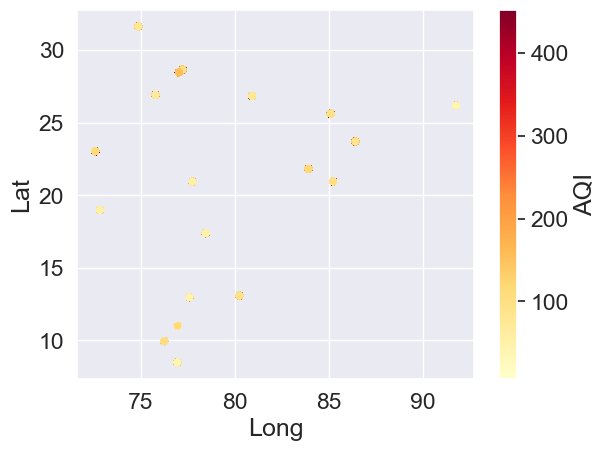

In [58]:
df_2.plot(x='Long',y='Lat',kind = 'scatter',c='AQI',colormap = 'YlOrRd')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_85204\1608915734.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

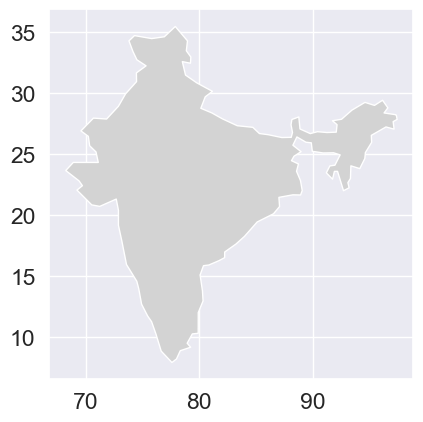

In [59]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries['name']=='India'].plot(color='lightgrey')

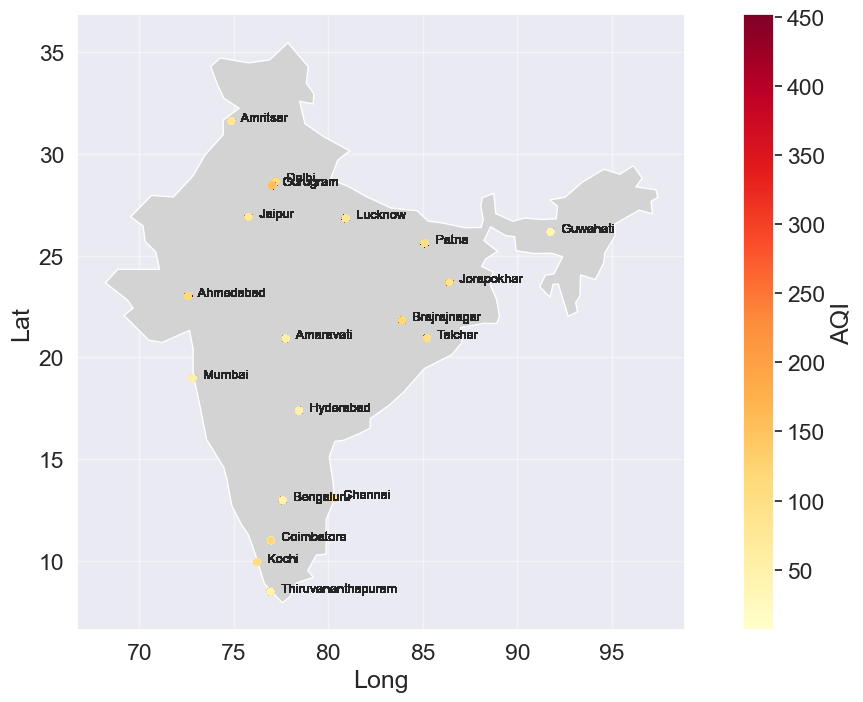

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
countries[countries['name'] == 'India'].plot(color='lightgrey', ax=ax)
df_2.plot(x='Long', y='Lat', kind='scatter', c='AQI', colormap='YlOrRd', ax=ax)

for idx, row in df_2.iterrows():
    ax.annotate(str('   ' + row['City']), (row['Long'], row['Lat']), size=9)

ax.grid(True, alpha=0.5)
plt.show()


In [61]:
df.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  year  month  
0  27.640000  118.0   Moderate  2015      1  
1  24.550000  118.0   Moderate  2015      1  
2  29.070000  118.0   Moderate  2015      1  
3  18.590000  118.0   Moderate  2015      1  
4   3.671988  118.0   Moderate  2015      1

**Categorical data encoding**  _________  **Feature Engineering**

In [62]:
df.head(5)

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3        CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85  0.920000   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85  0.970000   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  2.856470   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85  1.700000   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  3.095578   

         SO2    AQI AQI_Bucket  year  month  
0  27.640000  118.0   Moderate  2015      1  
1  24.550000  118.0   Moderate  2015      1  
2  29.070000  118.0   Moderate  2015      1  
3  18.590000  118.0   Moderate  2015      1  
4   3.671988  118.0   Moderate  2015      1

(0.0, 474.29420539372586)

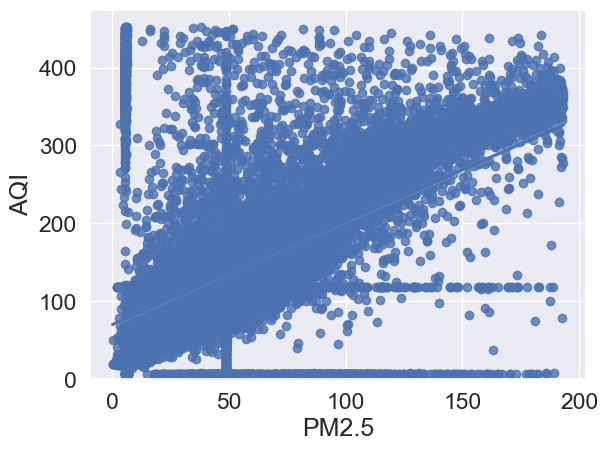

In [63]:
import seaborn as sns
sns.regplot(x="PM2.5",y="AQI",data=df)
plt.ylim(0,)

(0.0, 474.29420539372586)

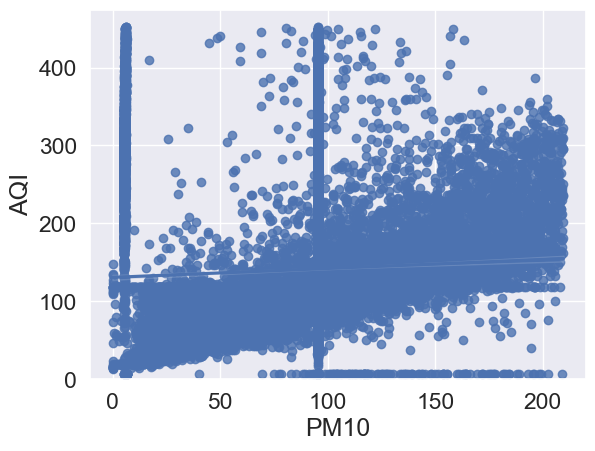

In [64]:
import seaborn as sns
sns.regplot(x="PM10",y="AQI",data=df)
plt.ylim(0,)

(0.0, 474.29420539372586)

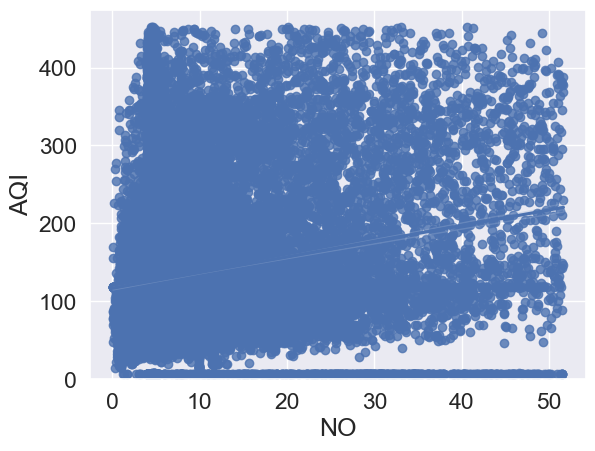

In [65]:
import seaborn as sns
sns.regplot(x="NO",y="AQI",data=df)
plt.ylim(0,)

(0.0, 474.29420539372586)

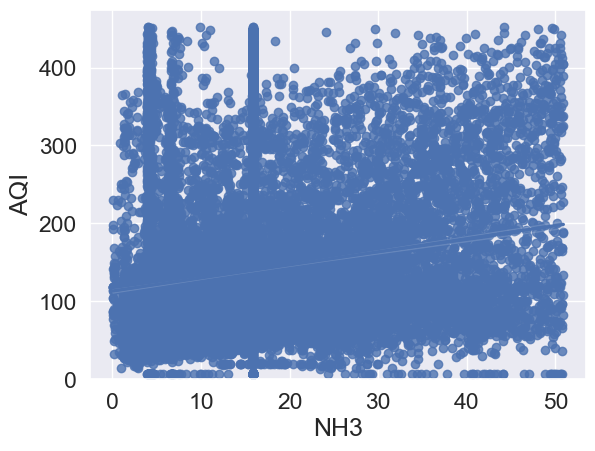

In [66]:
import seaborn as sns
sns.regplot(x="NH3",y="AQI",data=df)
plt.ylim(0,)

In [67]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [68]:
encoded_city = pd.get_dummies(df['City'], prefix='City')
df = pd.concat([df, encoded_city], axis=1)

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['AQI_Bucket_Label'] = label_encoder.fit_transform(df['AQI_Bucket'])


In [70]:
df.dtypes

City                               object
Date                       datetime64[ns]
PM2.5                             float64
PM10                              float64
NO                                float64
NO2                               float64
NOx                               float64
NH3                               float64
CO                                float64
SO2                               float64
AQI                               float64
AQI_Bucket                         object
year                                int32
month                               int32
Year                                int32
Month                               int32
Day                                 int32
City_Ahmedabad                       bool
City_Aizawl                          bool
City_Amaravati                       bool
City_Amritsar                        bool
City_Bengaluru                       bool
City_Bhopal                          bool
City_Brajrajnagar                 

**Machine Learning Model Training:**

In [71]:
df. head(2)

City       Date  PM2.5   PM10    NO    NO2    NOx    NH3    CO    SO2  \
0  Ahmedabad 2015-01-01  48.57  95.68  0.92  18.22  17.15  15.85  0.92  27.64   
1  Ahmedabad 2015-01-02  48.57  95.68  0.97  15.69  16.46  15.85  0.97  24.55   

   ...  City_Kochi City_Kolkata  City_Lucknow  City_Mumbai  City_Patna  \
0  ...       False        False         False        False       False   
1  ...       False        False         False        False       False   

   City_Shillong  City_Talcher  City_Thiruvananthapuram  City_Visakhapatnam  \
0          False         False                    False               False   
1          False         False                    False               False   

   AQI_Bucket_Label  
0                 1  
1                 1  

[2 rows x 44 columns]

In [72]:
# Extract the features (X) and target variable (y)
features1 = df[['Year','Month','Day','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2']]
features = df[['Year','Month','Day','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2','AQI_Bucket_Label']]
target = df[['AQI']]
features.head(2)

Year  Month  Day  PM2.5   PM10    NO    NO2    NOx    CO    SO2  \
0  2015      1    1  48.57  95.68  0.92  18.22  17.15  0.92  27.64   
1  2015      1    2  48.57  95.68  0.97  15.69  16.46  0.97  24.55   

   AQI_Bucket_Label  
0                 1  
1                 1

**Spliting The data into traning and testing dataset**

In [73]:
X1_train, X1_test, y_train, y_test = train_test_split(features1, target, test_size=0.3, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)

**Linear Regression Model**

In [74]:
linear_model = LinearRegression()
linear_model.fit(X1_train, y_train)
linear_predictions = linear_model.predict(X1_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print("Linear Regression - Mean Squared Error:", linear_mse)
print("Linear Regression - R2 Score:", linear_r2)

Linear Regression - Mean Squared Error: 4912.7091726635435
Linear Regression - R2 Score: 0.4054907701421431


**Decision Tree**

In [75]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
print("Decision Tree - Mean Squared Error:", tree_mse)
print("Decision Tree - R2 Score:", tree_r2)

Decision Tree - Mean Squared Error: 2370.1464637044373
Decision Tree - R2 Score: 0.7131778211851111


**Random Forest**

In [76]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)
print("Random Forest - Mean Squared Error:", forest_mse)
print("Random Forest - R2 Score:", forest_r2)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_85204\2123275848.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest - Mean Squared Error: 1315.5924953556687
Random Forest - R2 Score: 0.8407941822461631


**XGBOOST**

In [77]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost - Mean Squared Error:", xgb_mse)
print("XGBoost - R2 Score:", xgb_r2)

XGBoost - Mean Squared Error: 1490.568817413059
XGBoost - R2 Score: 0.8196195035070796


**LightGBM**

In [78]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# defining parameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,train_set=lgb_train,valid_sets=lgb_eval, early_stopping_rounds=30)
y_pred = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
lgb_r2 = r2_score(y_test, y_pred)
print("LightGBM - R2 Score:", lgb_r2)

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
lgb.plot_importance(model, height=.5)

**Ensemble Learning using Bagging**

In [79]:
#Creating the bagging ensemble model
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)

Adding the base estimators to the bagging ensemble model

In [80]:
bagging_model.estimators_ = [linear_model, tree_model, lgb_model, xgb_model]

Train and evaluate the ensemble model

In [81]:
bagging_model.fit(X_train, y_train)
ensemble_predictions = bagging_model.predict(X_test)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)
print("Ensemble - Mean Squared Error:", ensemble_mse)
print("Ensemble - R2 Score:", ensemble_r2)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Ensemble - Mean Squared Error: 1409.6553897972003
Ensemble - R2 Score: 0.8294112045515326


In [ ]:
pip install flask